# Effect of Water and Sanitation On Child Health and Mortality

Primary objective of this study is to analyze the dataset available from the World Health Organization (WHO) database and derive specific intelligence on the effect of water quality and basic sanitation availability on early (less than 5 years from birth) child health and mortality rate. We are assessing the impact of these variables across several countries from the World to understand the cause and effect relationship between the variable of interest and child health. We will further pursue to understand improvements made in selected countries over a period of time in the areas of water and sanitation facilities. This will be correlated with child health improvements in these countries over the same period to justify our hypothesis that water and sanitary health impact on child health is not just a correlation but rather a causation.

Link: http://apps.who.int/gho/data/node.sdg

## Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns
import re
import copy
import datetime
import geopandas as gpd

## URL link to the data to read from the web directly
No need to store the data on the local drive.

In [2]:
# Drinking Water data 
## by country only:
water_data_url = 'https://apps.who.int/gho/athena/data/GHO/WSH_WATER_SAFELY_MANAGED,WSH_WATER_BASIC?filter=COUNTRY'\
':*;RESIDENCEAREATYPE:*&x-sideaxis=COUNTRY&x-topaxis=YEAR;GHO;RESIDENCEAREATYPE&profile=crosstable'\
'&format=csv'

# Water Sanitation data
## by country only:
sanitation_data_url = 'https://apps.who.int/gho/athena/data/GHO/WSH_SANITATION_SAFELY_MANAGED,WSH_SANITATION_BASIC'\
'?filter=COUNTRY:*;RESIDENCEAREATYPE:*&x-sideaxis=COUNTRY&x-topaxis=YEAR;GHO;RESIDENCEAREATYPE&profile=crosstable&'\
'format=csv'

# Database to match the country and WHO regions for water and sanitation data
country_to_region_url = 'https://apps.who.int/gho/athena/data/data-verbose.csv?target=GHO/WSH_WATER_SAFELY_MANAGED,WSH_WATER_BASIC&profile'\
'=verbose&filter=COUNTRY:*;RESIDENCEAREATYPE:*'

# Child malnutrition data
## by country:
child_malnutrition_url = 'https://apps.who.int/gho/athena/data/GHO/NUTRITION_WH2,NUTRITION_HA_2,NUTRITION_WA_2,'\
'NUTRITION_WH_2?filter=COUNTRY:*;REGION:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;SEX&profile=crosstable&format=csv'
## by WHO region:
child_malnutrition_region_url = 'https://apps.who.int/gho/athena/data/GHO/NUTSEVWASTINGPREV,NUTSTUNTINGPREV,'\
'NUTOVERWEIGHTPREV,NUTUNDERWEIGHTPREV?filter=COUNTRY:-;REGION:*&x-sideaxis=REGION;YEAR&x-topaxis=GHO;SEX&profile'\
'=crosstable&format=csv'

# Infant and Child < 5 Mortality Rates data:
## by country:
child_mortality_country_url = 'https://apps.who.int/gho/athena/data/GHO/MDG_0000000007,WHOSIS_000003?filter='\
'COUNTRY:*;YEAR:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;SEX&profile=crosstable&format=csv'
## by WHO region:
child_mortality_url = 'https://apps.who.int/gho/athena/data/GHO/MDG_0000000007,WHOSIS_000003?filter=COUNTRY:-;'\
'REGION:*;YEAR:*&x-sideaxis=REGION&x-topaxis=GHO;SEX;YEAR&profile=crosstable&format=csv'

# Communicable Disease data:
## by country:
communicable_disease_url = 'https://apps.who.int/gho/athena/data/GHO/SDGHIV,SDGMALARIA,SDGNTDTREATMENT,'\
'MDG_0000000020,SDGHEPHBSAGPRV?filter=COUNTRY:*;YEAR:2018;YEAR:2017;YEAR:2016;YEAR:2015;YEAR:2014;YEAR:2013;'\
'YEAR:2012;YEAR:2011;YEAR:2010&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR;SEX&profile=crosstable&format=csv'
## by WHO region:
communicable_disease_region_url = 'https://apps.who.int/gho/athena/data/GHO/SDGHIV,SDGMALARIA,SDGNTDTREATMENT,'\
'MDG_0000000020,SDGHEPHBSAGPRV?filter=COUNTRY:-;REGION:*;YEAR:2018;YEAR:2017;YEAR:2016;YEAR:2015;YEAR:2014;YEAR:'\
'2013;YEAR:2012;YEAR:2011;YEAR:2010&x-sideaxis=REGION&x-topaxis=GHO;YEAR;SEX&profile=crosstable&format=csv'

# Noncommunicable diseases and mental health data:
## by country:
noncommunicable_disease_url = 'https://apps.who.int/gho/athena/data/GHO/NCDMORT3070,SDGSUICIDE?filter=COUNTRY:'\
'*;AGEGROUP:-&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;SEX&profile=crosstable&format=csv'
## by WHO region:
noncommunicable_disease_region_url = 'https://apps.who.int/gho/athena/data/GHO/NCDMORT3070,SDGSUICIDE?filter=COUNTRY'\
':-;REGION:*&x-sideaxis=REGION&x-topaxis=GHO;SEX;YEAR&profile=crosstable&format=csv'

# Mortality from environmental pollution data:
## by country:
mortality_pollution_url = 'https://apps.who.int/gho/athena/data/GHO/SDGAIRBOD,SDGAIRBODA,SDGWSHBOD,SDGPOISON?'\
'filter=COUNTRY:*;REGION:*;GHECAUSES:-;ENVCAUSE:-&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR;SEX&profile=crosstable&format=csv'
## by WHO region:
mortality_pollution_region_url = 'https://apps.who.int/gho/athena/data/GHO/SDGAIRBOD,SDGAIRBODA,SDGWSHBOD,SDGPOISON?'\
'filter=COUNTRY:-;REGION:*;GHECAUSES:-;ENVCAUSE:-&x-sideaxis=REGION&x-topaxis=GHO;YEAR;SEX&profile=crosstable&format=csv'

# SECTION1: DATA CLEANING

## Drinking Water data

### BY COUNTRY ONLY

In [3]:
df_water = pd.read_csv(water_data_url, skiprows = 0)
df_water.head()

,Unnamed: 0,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2016,2016.1,2016.2,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
0,NaN,Population using at least basic drinking-wate...,Population using at least basic drinking-wate...,Population using at least basic drinking-wate...,Population using safely managed drinking-wate...,Population using safely managed drinking-wate...,Population using safely managed drinking-wate...,Population using at least basic drinking-wate...,Population using at least basic drinking-wate...,Population using at least basic drinking-wate...,...,Population using at least basic drinking-wate...,Population using safely managed drinking-wate...,Population using safely managed drinking-wate...,Population using safely managed drinking-wate...,Population using at least basic drinking-wate...,Population using at least basic drinking-wate...,Population using at least basic drinking-wate...,Population using safely managed drinking-wate...,Population using safely managed drinking-wate...,Population using safely managed drinking-wate...
1,Country,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,...,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural
2,Afghanistan,67,96,57,NaN,NaN,NaN,64,93,55,...,22,NaN,NaN,NaN,28,49,22,NaN,NaN,NaN
3,Albania,91,92,90,70,NaN,NaN,91,92,90,...,82,49,NaN,NaN,88,96,82,49,NaN,NaN
4,Algeria,94,95,89,NaN,NaN,NaN,94,95,89,...,84,NaN,NaN,NaN,90,94,83,NaN,NaN,NaN


In [4]:
# Better undesrtand the columns
list(df_water.iloc[0])[1:]

[' Population using at least basic drinking-water services (%)',
 ' Population using at least basic drinking-water services (%)',
 ' Population using at least basic drinking-water services (%)',
 ' Population using safely managed drinking-water services (%)',
 ' Population using safely managed drinking-water services (%)',
 ' Population using safely managed drinking-water services (%)',
 ' Population using at least basic drinking-water services (%)',
 ' Population using at least basic drinking-water services (%)',
 ' Population using at least basic drinking-water services (%)',
 ' Population using safely managed drinking-water services (%)',
 ' Population using safely managed drinking-water services (%)',
 ' Population using safely managed drinking-water services (%)',
 ' Population using at least basic drinking-water services (%)',
 ' Population using at least basic drinking-water services (%)',
 ' Population using at least basic drinking-water services (%)',
 ' Population using safel

In [5]:
# Better undesrtand the columns
columns = list(map(lambda x: x.split('.')[0], list(df_water.columns)))
columns[0] = 'country'
print(columns[1:])

['2017', '2017', '2017', '2017', '2017', '2017', '2016', '2016', '2016', '2016', '2016', '2016', '2015', '2015', '2015', '2015', '2015', '2015', '2014', '2014', '2014', '2014', '2014', '2014', '2013', '2013', '2013', '2013', '2013', '2013', '2012', '2012', '2012', '2012', '2012', '2012', '2011', '2011', '2011', '2011', '2011', '2011', '2010', '2010', '2010', '2010', '2010', '2010', '2009', '2009', '2009', '2009', '2009', '2009', '2008', '2008', '2008', '2008', '2008', '2008', '2007', '2007', '2007', '2007', '2007', '2007', '2006', '2006', '2006', '2006', '2006', '2006', '2005', '2005', '2005', '2005', '2005', '2005', '2004', '2004', '2004', '2004', '2004', '2004', '2003', '2003', '2003', '2003', '2003', '2003', '2002', '2002', '2002', '2002', '2002', '2002', '2001', '2001', '2001', '2001', '2001', '2001', '2000', '2000', '2000', '2000', '2000', '2000']


In [6]:
df_w = copy.deepcopy(df_water)
df_w.head()

,Unnamed: 0,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2016,2016.1,2016.2,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
0,NaN,Population using at least basic drinking-wate...,Population using at least basic drinking-wate...,Population using at least basic drinking-wate...,Population using safely managed drinking-wate...,Population using safely managed drinking-wate...,Population using safely managed drinking-wate...,Population using at least basic drinking-wate...,Population using at least basic drinking-wate...,Population using at least basic drinking-wate...,...,Population using at least basic drinking-wate...,Population using safely managed drinking-wate...,Population using safely managed drinking-wate...,Population using safely managed drinking-wate...,Population using at least basic drinking-wate...,Population using at least basic drinking-wate...,Population using at least basic drinking-wate...,Population using safely managed drinking-wate...,Population using safely managed drinking-wate...,Population using safely managed drinking-wate...
1,Country,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,...,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural
2,Afghanistan,67,96,57,NaN,NaN,NaN,64,93,55,...,22,NaN,NaN,NaN,28,49,22,NaN,NaN,NaN
3,Albania,91,92,90,70,NaN,NaN,91,92,90,...,82,49,NaN,NaN,88,96,82,49,NaN,NaN
4,Algeria,94,95,89,NaN,NaN,NaN,94,95,89,...,84,NaN,NaN,NaN,90,94,83,NaN,NaN,NaN


In [7]:
# Remove the first two rows
df_w  = df_w.drop([0,1], axis = 0)
df_w.head()

,Unnamed: 0,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2016,2016.1,2016.2,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
2,Afghanistan,67,96,57,NaN,NaN,NaN,64,93,55,...,22,NaN,NaN,NaN,28,49,22,NaN,NaN,NaN
3,Albania,91,92,90,70,NaN,NaN,91,92,90,...,82,49,NaN,NaN,88,96,82,49,NaN,NaN
4,Algeria,94,95,89,NaN,NaN,NaN,94,95,89,...,84,NaN,NaN,NaN,90,94,83,NaN,NaN,NaN
5,Andorra,100,100,100,91,NaN,NaN,100,100,100,...,100,91,NaN,NaN,100,100,100,91,NaN,NaN
6,Angola,56,71,27,NaN,NaN,NaN,55,71,27,...,22,NaN,NaN,NaN,41,61,21,NaN,NaN,NaN


In [8]:
df_w = df_w.rename(columns = {'Unnamed: 0': 'country'})
df_w.head(3)

,country,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2016,2016.1,2016.2,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
2,Afghanistan,67,96,57,NaN,NaN,NaN,64,93,55,...,22,NaN,NaN,NaN,28,49,22,NaN,NaN,NaN
3,Albania,91,92,90,70,NaN,NaN,91,92,90,...,82,49,NaN,NaN,88,96,82,49,NaN,NaN
4,Algeria,94,95,89,NaN,NaN,NaN,94,95,89,...,84,NaN,NaN,NaN,90,94,83,NaN,NaN,NaN


In [9]:
df_w = df_w.set_index(['country'])
df_w.head()

,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2016,2016.1,2016.2,2016.3,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,67,96,57,NaN,NaN,NaN,64,93,55,NaN,...,22,NaN,NaN,NaN,28,49,22,NaN,NaN,NaN
Albania,91,92,90,70,NaN,NaN,91,92,90,70,...,82,49,NaN,NaN,88,96,82,49,NaN,NaN
Algeria,94,95,89,NaN,NaN,NaN,94,95,89,NaN,...,84,NaN,NaN,NaN,90,94,83,NaN,NaN,NaN
Andorra,100,100,100,91,NaN,NaN,100,100,100,91,...,100,91,NaN,NaN,100,100,100,91,NaN,NaN
Angola,56,71,27,NaN,NaN,NaN,55,71,27,NaN,...,22,NaN,NaN,NaN,41,61,21,NaN,NaN,NaN


### In the reshaped table:

>safe   = Population using safely managed drinking-water services (%),

>basic  = Population using at least basic drinking-water services (%)
 

In [10]:
# Create multi-level columns
df_w.columns = pd.MultiIndex.from_product([list(range(2017,1999,-1)), ['basic', 'safe'], ['rural', 'urban', 'total']])
df_w.head()

2017                                2016                    ...  \
            basic              safe             basic              safe  ...   
            rural urban total rural urban total rural urban total rural  ...   
country                                                                  ...   
Afghanistan    67    96    57   NaN   NaN   NaN    64    93    55   NaN  ...   
Albania        91    92    90    70   NaN   NaN    91    92    90    70  ...   
Algeria        94    95    89   NaN   NaN   NaN    94    95    89   NaN  ...   
Andorra       100   100   100    91   NaN   NaN   100   100   100    91  ...   
Angola         56    71    27   NaN   NaN   NaN    55    71    27   NaN  ...   

             2001                    2000                                
            basic  safe             basic              safe              
            total rural urban total rural urban total rural urban total  
country                                                                  
Afghanistan    22   NaN   NaN   NaN    28    49    22   NaN   NaN   NaN  
Albania        82    49   NaN   NaN    88    96    82    49   NaN   NaN  
Algeria        84   NaN   NaN   NaN    90    94    83   NaN   NaN   NaN  
Andorra       100    91   NaN   NaN   100   100   100    91   NaN   NaN  
Angola         22   NaN   NaN   NaN    41    61    21   NaN   NaN   NaN  

[5 rows x 108 columns]

#### Cleaned dataset

In [11]:
df_w = df_w.stack(level = 0)

In [12]:
df_w.head()

basic              safe            
                 rural total urban rural total urban
country                                             
Afghanistan 2000    28    22    49   NaN   NaN   NaN
            2001    28    22    49   NaN   NaN   NaN
            2002    30    24    52   NaN   NaN   NaN
            2003    32    26    54   NaN   NaN   NaN
            2004    34    28    57   NaN   NaN   NaN

## Sanitation data

### BY COUNTRY ONLY

In [13]:
df_sanitation = pd.read_csv(sanitation_data_url, skiprows = 0)
df_sanitation.head(3)

,Unnamed: 0,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2016,2016.1,2016.2,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
0,NaN,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,...,Population using at least basic sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...
1,Country,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,...,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural
2,Afghanistan,43,62,37,NaN,NaN,NaN,42,60,36,...,22,NaN,NaN,NaN,24,30,22,NaN,NaN,NaN


In [14]:
# Better undesrtand the columns
list(df_sanitation.iloc[0])[1:]

[' Population using at least basic sanitation services (%)',
 ' Population using at least basic sanitation services (%)',
 ' Population using at least basic sanitation services (%)',
 ' Population using safely managed sanitation services (%)',
 ' Population using safely managed sanitation services (%)',
 ' Population using safely managed sanitation services (%)',
 ' Population using at least basic sanitation services (%)',
 ' Population using at least basic sanitation services (%)',
 ' Population using at least basic sanitation services (%)',
 ' Population using safely managed sanitation services (%)',
 ' Population using safely managed sanitation services (%)',
 ' Population using safely managed sanitation services (%)',
 ' Population using at least basic sanitation services (%)',
 ' Population using at least basic sanitation services (%)',
 ' Population using at least basic sanitation services (%)',
 ' Population using safely managed sanitation services (%)',
 ' Population using safe

In [15]:
# Better undesrtand the columns
columns = list(map(lambda x: x.split('.')[0], list(df_sanitation.columns)))
columns[0] = 'country'
print(columns[1:])

['2017', '2017', '2017', '2017', '2017', '2017', '2016', '2016', '2016', '2016', '2016', '2016', '2015', '2015', '2015', '2015', '2015', '2015', '2014', '2014', '2014', '2014', '2014', '2014', '2013', '2013', '2013', '2013', '2013', '2013', '2012', '2012', '2012', '2012', '2012', '2012', '2011', '2011', '2011', '2011', '2011', '2011', '2010', '2010', '2010', '2010', '2010', '2010', '2009', '2009', '2009', '2009', '2009', '2009', '2008', '2008', '2008', '2008', '2008', '2008', '2007', '2007', '2007', '2007', '2007', '2007', '2006', '2006', '2006', '2006', '2006', '2006', '2005', '2005', '2005', '2005', '2005', '2005', '2004', '2004', '2004', '2004', '2004', '2004', '2003', '2003', '2003', '2003', '2003', '2003', '2002', '2002', '2002', '2002', '2002', '2002', '2001', '2001', '2001', '2001', '2001', '2001', '2000', '2000', '2000', '2000', '2000', '2000']


In [16]:
df_s = copy.deepcopy(df_sanitation)
df_s.head()

,Unnamed: 0,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2016,2016.1,2016.2,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
0,NaN,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,...,Population using at least basic sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...
1,Country,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,...,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural
2,Afghanistan,43,62,37,NaN,NaN,NaN,42,60,36,...,22,NaN,NaN,NaN,24,30,22,NaN,NaN,NaN
3,Albania,98,98,97,40,40,39,98,98,97,...,83,38,40,37,88,97,82,39,40,38
4,Algeria,88,90,82,18,16,21,88,90,82,...,73,19,18,19,84,91,72,19,18,19


In [17]:
df_s = df_s.rename(columns = {'Unnamed: 0': 'country'})
df_s.head()

,country,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2016,2016.1,2016.2,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
0,NaN,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,...,Population using at least basic sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using at least basic sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...,Population using safely managed sanitation se...
1,Country,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural,...,Rural,Total,Urban,Rural,Total,Urban,Rural,Total,Urban,Rural
2,Afghanistan,43,62,37,NaN,NaN,NaN,42,60,36,...,22,NaN,NaN,NaN,24,30,22,NaN,NaN,NaN
3,Albania,98,98,97,40,40,39,98,98,97,...,83,38,40,37,88,97,82,39,40,38
4,Algeria,88,90,82,18,16,21,88,90,82,...,73,19,18,19,84,91,72,19,18,19


In [18]:
df_s = df_s.drop([0, 1], axis = 0)
df_s.head()

,country,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2016,2016.1,2016.2,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
2,Afghanistan,43,62,37,NaN,NaN,NaN,42,60,36,...,22,NaN,NaN,NaN,24,30,22,NaN,NaN,NaN
3,Albania,98,98,97,40,40,39,98,98,97,...,83,38,40,37,88,97,82,39,40,38
4,Algeria,88,90,82,18,16,21,88,90,82,...,73,19,18,19,84,91,72,19,18,19
5,Andorra,100,100,100,100,100,100,100,100,100,...,100,22,22,22,100,100,100,15,15,15
6,Angola,50,64,23,NaN,NaN,NaN,49,63,22,...,8,NaN,NaN,NaN,28,48,8,NaN,NaN,NaN


In [19]:
df_s = df_s.set_index('country')
df_s.head()

,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2016,2016.1,2016.2,2016.3,...,2001.2,2001.3,2001.4,2001.5,2000,2000.1,2000.2,2000.3,2000.4,2000.5
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,43,62,37,NaN,NaN,NaN,42,60,36,NaN,...,22,NaN,NaN,NaN,24,30,22,NaN,NaN,NaN
Albania,98,98,97,40,40,39,98,98,97,40,...,83,38,40,37,88,97,82,39,40,38
Algeria,88,90,82,18,16,21,88,90,82,18,...,73,19,18,19,84,91,72,19,18,19
Andorra,100,100,100,100,100,100,100,100,100,100,...,100,22,22,22,100,100,100,15,15,15
Angola,50,64,23,NaN,NaN,NaN,49,63,22,NaN,...,8,NaN,NaN,NaN,28,48,8,NaN,NaN,NaN


### In the reshaped table:

>safe   = Population using safely managed sanitation services (%),

>basic  = Population using at least basic sanitation services (%)


In [20]:
df_s.columns = pd.MultiIndex.from_product([list(range(2017,1999,-1)), ['basic', 'safe'], ['rural', 'urban', 'total']])
df_s.head()

2017                                2016                    ...  \
            basic              safe             basic              safe  ...   
            rural urban total rural urban total rural urban total rural  ...   
country                                                                  ...   
Afghanistan    43    62    37   NaN   NaN   NaN    42    60    36   NaN  ...   
Albania        98    98    97    40    40    39    98    98    97    40  ...   
Algeria        88    90    82    18    16    21    88    90    82    18  ...   
Andorra       100   100   100   100   100   100   100   100   100   100  ...   
Angola         50    64    23   NaN   NaN   NaN    49    63    22   NaN  ...   

             2001                    2000                                
            basic  safe             basic              safe              
            total rural urban total rural urban total rural urban total  
country                                                                  
Afghanistan    22   NaN   NaN   NaN    24    30    22   NaN   NaN   NaN  
Albania        83    38    40    37    88    97    82    39    40    38  
Algeria        73    19    18    19    84    91    72    19    18    19  
Andorra       100    22    22    22   100   100   100    15    15    15  
Angola          8   NaN   NaN   NaN    28    48     8   NaN   NaN   NaN  

[5 rows x 108 columns]

#### Cleaned dataset

In [21]:
df_s = df_s.stack(level = 0)

In [22]:
df_s.head()

basic              safe            
                 rural total urban rural total urban
country                                             
Afghanistan 2000    24    22    30   NaN   NaN   NaN
            2001    24    22    30   NaN   NaN   NaN
            2002    25    23    31   NaN   NaN   NaN
            2003    26    24    33   NaN   NaN   NaN
            2004    27    25    35   NaN   NaN   NaN

## Children malnutrtion data

### BY COUNTRY

In [23]:
df_child = pd.read_csv(child_malnutrition_url)
df_child.head(3)

,Unnamed: 0,Unnamed: 1,Children aged &lt;5 years wasted &lt;br&gt; (% weight-for-height &lt;-2 SD),Children aged &lt;5 years overweight &lt;br&gt; (% weight-for-height &gt;+2 SD),Children aged &lt;5 years stunted &lt;br&gt; (% height-for-age &lt;-2 SD),Children aged &lt;5 years underweight &lt;br&gt; (% weight-for-age &lt;-2 SD) (%)
0,Country,Year,Both sexes,Both sexes,Both sexes,Both sexes
1,Afghanistan,2013,9.5,5.4,40.9,25.0
2,Afghanistan,2004,8.6,4.6,59.3,32.9


### In the reformatted table:

>wated       = Children aged <5 years wasted (% weight-for-height <-2 SD)

>overweight  = Children aged <5 years overweight (% weight-for-height >+2 SD)

>stunted     = Children aged <5 years stunted (% weight-for-height <-2 SD)

>underweight = Children aged <5 years underweight (% weight-for-height <-2 SD)

In [24]:
# Renaming the columns
cols = ['country', 'year', 'wasted', 'overweight', 'stunted', 'underweight']
df_c = pd.read_csv(child_malnutrition_url, names = cols, skiprows = 2)
df_c.head(20)

,country,year,wasted,overweight,stunted,underweight
0,Afghanistan,2013,9.5,5.4,40.9,25.0
1,Afghanistan,2004,8.6,4.6,59.3,32.9
2,Afghanistan,1997,18.2,6.5,53.2,44.9
3,Albania,2017-2018,1.6,16.4,11.3,1.5
4,Albania,2008-2009,9.6,23.2,23.2,6.3
5,Albania,2005,7.3,24.8,26.7,6.6
6,Albania,2000,12.2,30.0,39.2,17.0
7,Albania,1996-1998,8.1,9.5,20.4,7.1
8,Algeria,2012-2013,4.1,12.4,11.7,3.0
9,Algeria,2005,4.0,12.9,15.9,3.7


In [25]:
# Replcae the 'year ranges' with the lower bound year in the 'year' column
year = list(map(lambda x: re.sub('^(.*-)', '', x), list(df_c.year)))
year2 = list(map(lambda x: re.sub('^(.*\s+)', '', x), list(year)))

In [26]:
df_c['year'] = year2

In [27]:
df_c.head(20)

,country,year,wasted,overweight,stunted,underweight
0,Afghanistan,2013,9.5,5.4,40.9,25.0
1,Afghanistan,2004,8.6,4.6,59.3,32.9
2,Afghanistan,1997,18.2,6.5,53.2,44.9
3,Albania,2018,1.6,16.4,11.3,1.5
4,Albania,2009,9.6,23.2,23.2,6.3
5,Albania,2005,7.3,24.8,26.7,6.6
6,Albania,2000,12.2,30.0,39.2,17.0
7,Albania,1998,8.1,9.5,20.4,7.1
8,Algeria,2013,4.1,12.4,11.7,3.0
9,Algeria,2005,4.0,12.9,15.9,3.7


#### Cleaned dataset BY COUNTRY

In [28]:
pd.pivot_table(df_c, index = ['country', 'year'])

overweight  stunted  underweight  wasted
country     year                                          
Afghanistan 1997         6.5     53.2         44.9    18.2
            2004         4.6     59.3         32.9     8.6
            2013         5.4     40.9         25.0     9.5
Albania     1998         9.5     20.4          7.1     8.1
            2000        30.0     39.2         17.0    12.2
...                      ...      ...          ...     ...
Zimbabwe    2006         8.8     35.3         14.0     7.3
            2009         3.5     35.1         12.6     3.8
            2011         5.8     32.2         10.2     3.2
            2014         3.6     27.6         11.3     3.4
            2015         5.6     27.1          8.5     3.3

[845 rows x 4 columns]

### BY WHO REGION

In [29]:
df_child_region = pd.read_csv(child_malnutrition_region_url)
df_child_region.head()

,WHO region,Year,Overweight prevalence,Stunting prevalence,Underweight prevalence,Wasting prevalence
0,Global,2030,NaN,17.5 [15.6-19.4],NaN,NaN
1,Global,2025,NaN,19.2 [17.4-21.0],NaN,NaN
2,Global,2020,NaN,21.1 [19.4-22.8],NaN,NaN
3,Global,2018,5.9 [5.0-6.8],21.9 [20.3-23.6],13.4 [11.8-15.0],2.4 [1.9-3.0]
4,Global,2015,5.7 [5.0-6.5],23.3 [21.7-25.0],14.4 [12.7-16.0],NaN


In [30]:
df_c_r = copy.deepcopy(df_child_region)

In [31]:
df_c_r.dtypes

WHO region                object
Year                       int64
Overweight prevalence     object
Stunting prevalence       object
Underweight prevalence    object
Wasting prevalence        object
dtype: object

In [32]:
# Renaming the columns
cols2 = ['region', 'year', 'overweight', 'stunted', 'underweight', 'wasted']
df_c_r.columns = cols2
df_c_r.head(2)

,region,year,overweight,stunted,underweight,wasted
0,Global,2030,NaN,17.5 [15.6-19.4],NaN,NaN
1,Global,2025,NaN,19.2 [17.4-21.0],NaN,NaN


Removing the confidence inetrvals within each columns

In [33]:
# Removing the confidence intervals within the columns
df_c_r.iloc[:, 2:] = df_c_r.iloc[:, 2:].astype('str')
for c in df_c_r.columns[2:]:
    df_c_r[c] = list(map(lambda x: re.sub(r'\[.*\]', '', x), list(df_c_r[c])))

In [34]:
df_c_r.head()

,region,year,overweight,stunted,underweight,wasted
0,Global,2030,nan,17.5,nan,nan
1,Global,2025,nan,19.2,nan,nan
2,Global,2020,nan,21.1,nan,nan
3,Global,2018,5.9,21.9,13.4,2.4
4,Global,2015,5.7,23.3,14.4,nan


In [35]:
# Changing values back to float numbers
df_c_r.iloc[:, 2:] = df_c_r.iloc[:, 2:].astype('float')
df_c_r.dtypes

region          object
year             int64
overweight     float64
stunted        float64
underweight    float64
wasted         float64
dtype: object

## Children mortality data

### BY COUNTRY

In [36]:
df_mortality_country = pd.read_csv(child_mortality_country_url)
df_mortality_country.head(3)

,Unnamed: 0,Unnamed: 1,Neonatal mortality rate (per 1000 live births),Under-five mortality rate (probability of dying by age 5 per 1000 live births),Under-five mortality rate (probability of dying by age 5 per 1000 live births).1,Under-five mortality rate (probability of dying by age 5 per 1000 live births).2
0,Country,Year,Both sexes,Both sexes,Male,Female
1,Afghanistan,2018,37.1,62.3,65.7,58.7
2,Afghanistan,2017,38.1,64.7,68.1,61.1


In [37]:
df_m_cntr = copy.deepcopy(df_mortality_country)

In [38]:
df_m_cntr.columns

Index(['Unnamed: 0', 'Unnamed: 1',
       'Neonatal mortality rate (per 1000 live births)',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births)',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births).1',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births).2'],
      dtype='object')

In [39]:
# Renaming the columns
df_m_cntr.columns = ['country', 'year', 'neonatal_both', 'under5_both', 'under5_male', 'under5_female']
df_m_cntr.head()

,country,year,neonatal_both,under5_both,under5_male,under5_female
0,Country,Year,Both sexes,Both sexes,Male,Female
1,Afghanistan,2018,37.1,62.3,65.7,58.7
2,Afghanistan,2017,38.1,64.7,68.1,61.1
3,Afghanistan,2016,39.3,67.5,70.9,63.7
4,Afghanistan,2015,40.5,70.4,73.8,66.7


In [40]:
df_m_cntr = df_m_cntr.drop([0, 1], axis = 0)
df_m_cntr.head()

,country,year,neonatal_both,under5_both,under5_male,under5_female
2,Afghanistan,2017,38.1,64.7,68.1,61.1
3,Afghanistan,2016,39.3,67.5,70.9,63.7
4,Afghanistan,2015,40.5,70.4,73.8,66.7
5,Afghanistan,2014,41.9,73.6,77,69.9
6,Afghanistan,2013,43.3,76.9,80.5,73.2


In [41]:
# Reformatting the table
df_m_cntr = df_m_cntr.set_index(['country', 'year'])
df_m_cntr.head()

neonatal_both under5_both under5_male under5_female
country     year                                                     
Afghanistan  2017          38.1        64.7        68.1          61.1
             2016          39.3        67.5        70.9          63.7
             2015          40.5        70.4        73.8          66.7
             2014          41.9        73.6          77          69.9
             2013          43.3        76.9        80.5          73.2

### BY WHO REGION

In [42]:
df_mortality = pd.read_csv(child_mortality_url)
df_mortality.head(3)

,Unnamed: 0,Neonatal mortality rate (per 1000 live births),Neonatal mortality rate (per 1000 live births).1,Neonatal mortality rate (per 1000 live births).2,Neonatal mortality rate (per 1000 live births).3,Neonatal mortality rate (per 1000 live births).4,Neonatal mortality rate (per 1000 live births).5,Neonatal mortality rate (per 1000 live births).6,Neonatal mortality rate (per 1000 live births).7,Neonatal mortality rate (per 1000 live births).8,...,Under-five mortality rate (probability of dying by age 5 per 1000 live births).77,Under-five mortality rate (probability of dying by age 5 per 1000 live births).78,Under-five mortality rate (probability of dying by age 5 per 1000 live births).79,Under-five mortality rate (probability of dying by age 5 per 1000 live births).80,Under-five mortality rate (probability of dying by age 5 per 1000 live births).81,Under-five mortality rate (probability of dying by age 5 per 1000 live births).82,Under-five mortality rate (probability of dying by age 5 per 1000 live births).83,Under-five mortality rate (probability of dying by age 5 per 1000 live births).84,Under-five mortality rate (probability of dying by age 5 per 1000 live births).85,Under-five mortality rate (probability of dying by age 5 per 1000 live births).86
0,NaN,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,...,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female
1,WHO region,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
2,Global,17.7,18.2,18.6,19.1,19.6,20.2,20.8,21.4,22.1,...,76.7,79.1,81,82.8,84.6,86.1,87.1,88.3,89.4,90.5


In [43]:
df_mortality['Unnamed: 0'].unique()

array([nan, 'WHO region', 'Global', 'Africa', 'Americas',
       'South-East Asia', 'Europe', 'Eastern Mediterranean',
       'Western Pacific'], dtype=object)

In [44]:
# Better understanding the columns
df_mortality.columns.unique()

Index(['Unnamed: 0', 'Neonatal mortality rate (per 1000 live births)',
       'Neonatal mortality rate (per 1000 live births).1',
       'Neonatal mortality rate (per 1000 live births).2',
       'Neonatal mortality rate (per 1000 live births).3',
       'Neonatal mortality rate (per 1000 live births).4',
       'Neonatal mortality rate (per 1000 live births).5',
       'Neonatal mortality rate (per 1000 live births).6',
       'Neonatal mortality rate (per 1000 live births).7',
       'Neonatal mortality rate (per 1000 live births).8',
       ...
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births).77',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births).78',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births).79',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births).80',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live

In [45]:
# Better understanding the columns
columns = list(map(lambda x: x.split('.')[0], list(df_mortality.columns)))
pd.Series(columns).value_counts()

Under-five mortality rate (probability of dying by age 5 per 1000 live births)    87
Neonatal mortality rate (per 1000 live births)                                    29
Unnamed: 0                                                                         1
dtype: int64

In [46]:
df_m = copy.deepcopy(df_mortality)
df_m.head(5)

,Unnamed: 0,Neonatal mortality rate (per 1000 live births),Neonatal mortality rate (per 1000 live births).1,Neonatal mortality rate (per 1000 live births).2,Neonatal mortality rate (per 1000 live births).3,Neonatal mortality rate (per 1000 live births).4,Neonatal mortality rate (per 1000 live births).5,Neonatal mortality rate (per 1000 live births).6,Neonatal mortality rate (per 1000 live births).7,Neonatal mortality rate (per 1000 live births).8,...,Under-five mortality rate (probability of dying by age 5 per 1000 live births).77,Under-five mortality rate (probability of dying by age 5 per 1000 live births).78,Under-five mortality rate (probability of dying by age 5 per 1000 live births).79,Under-five mortality rate (probability of dying by age 5 per 1000 live births).80,Under-five mortality rate (probability of dying by age 5 per 1000 live births).81,Under-five mortality rate (probability of dying by age 5 per 1000 live births).82,Under-five mortality rate (probability of dying by age 5 per 1000 live births).83,Under-five mortality rate (probability of dying by age 5 per 1000 live births).84,Under-five mortality rate (probability of dying by age 5 per 1000 live births).85,Under-five mortality rate (probability of dying by age 5 per 1000 live births).86
0,NaN,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,...,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female
1,WHO region,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
2,Global,17.7,18.2,18.6,19.1,19.6,20.2,20.8,21.4,22.1,...,76.7,79.1,81,82.8,84.6,86.1,87.1,88.3,89.4,90.5
3,Africa,27.2,27.7,28.2,28.7,29.2,29.8,30.4,31,31.7,...,148,152.3,155.5,158.2,161.3,163.9,164.2,165.4,166.6,167.7
4,Americas,7.4,7.6,8,8.1,8.2,8.3,8.5,8.7,8.9,...,24.9,26.4,27.5,29,30.6,32.2,33.9,35.6,37.3,39.1


In [47]:
df_m.iloc[0].value_counts()

 Both sexes    58
 Male          29
 Female        29
Name: 0, dtype: int64

In [48]:
df_m = df_m.rename(columns = {'Unnamed: 0': 'region'})
df_m.head()

,region,Neonatal mortality rate (per 1000 live births),Neonatal mortality rate (per 1000 live births).1,Neonatal mortality rate (per 1000 live births).2,Neonatal mortality rate (per 1000 live births).3,Neonatal mortality rate (per 1000 live births).4,Neonatal mortality rate (per 1000 live births).5,Neonatal mortality rate (per 1000 live births).6,Neonatal mortality rate (per 1000 live births).7,Neonatal mortality rate (per 1000 live births).8,...,Under-five mortality rate (probability of dying by age 5 per 1000 live births).77,Under-five mortality rate (probability of dying by age 5 per 1000 live births).78,Under-five mortality rate (probability of dying by age 5 per 1000 live births).79,Under-five mortality rate (probability of dying by age 5 per 1000 live births).80,Under-five mortality rate (probability of dying by age 5 per 1000 live births).81,Under-five mortality rate (probability of dying by age 5 per 1000 live births).82,Under-five mortality rate (probability of dying by age 5 per 1000 live births).83,Under-five mortality rate (probability of dying by age 5 per 1000 live births).84,Under-five mortality rate (probability of dying by age 5 per 1000 live births).85,Under-five mortality rate (probability of dying by age 5 per 1000 live births).86
0,NaN,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,...,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female
1,WHO region,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
2,Global,17.7,18.2,18.6,19.1,19.6,20.2,20.8,21.4,22.1,...,76.7,79.1,81,82.8,84.6,86.1,87.1,88.3,89.4,90.5
3,Africa,27.2,27.7,28.2,28.7,29.2,29.8,30.4,31,31.7,...,148,152.3,155.5,158.2,161.3,163.9,164.2,165.4,166.6,167.7
4,Americas,7.4,7.6,8,8.1,8.2,8.3,8.5,8.7,8.9,...,24.9,26.4,27.5,29,30.6,32.2,33.9,35.6,37.3,39.1


In [49]:
df_m = df_m.drop([0, 1], axis = 0)
df_m.head()

,region,Neonatal mortality rate (per 1000 live births),Neonatal mortality rate (per 1000 live births).1,Neonatal mortality rate (per 1000 live births).2,Neonatal mortality rate (per 1000 live births).3,Neonatal mortality rate (per 1000 live births).4,Neonatal mortality rate (per 1000 live births).5,Neonatal mortality rate (per 1000 live births).6,Neonatal mortality rate (per 1000 live births).7,Neonatal mortality rate (per 1000 live births).8,...,Under-five mortality rate (probability of dying by age 5 per 1000 live births).77,Under-five mortality rate (probability of dying by age 5 per 1000 live births).78,Under-five mortality rate (probability of dying by age 5 per 1000 live births).79,Under-five mortality rate (probability of dying by age 5 per 1000 live births).80,Under-five mortality rate (probability of dying by age 5 per 1000 live births).81,Under-five mortality rate (probability of dying by age 5 per 1000 live births).82,Under-five mortality rate (probability of dying by age 5 per 1000 live births).83,Under-five mortality rate (probability of dying by age 5 per 1000 live births).84,Under-five mortality rate (probability of dying by age 5 per 1000 live births).85,Under-five mortality rate (probability of dying by age 5 per 1000 live births).86
2,Global,17.7,18.2,18.6,19.1,19.6,20.2,20.8,21.4,22.1,...,76.7,79.1,81,82.8,84.6,86.1,87.1,88.3,89.4,90.5
3,Africa,27.2,27.7,28.2,28.7,29.2,29.8,30.4,31,31.7,...,148,152.3,155.5,158.2,161.3,163.9,164.2,165.4,166.6,167.7
4,Americas,7.4,7.6,8,8.1,8.2,8.3,8.5,8.7,8.9,...,24.9,26.4,27.5,29,30.6,32.2,33.9,35.6,37.3,39.1
5,South-East Asia,20.2,21,22,23,24,25.1,26.2,27.4,28.5,...,89.3,93.2,96.8,100.1,103.5,106.7,109.8,113,116.3,119.8
6,Europe,4.6,4.7,4.9,5.2,5.4,5.7,5.9,6.2,6.4,...,20.3,21.5,22.7,23.8,24.7,25.6,26.3,26.7,27.2,27.8


In [50]:
df_m = df_m.set_index('region')
df_m.head()

,Neonatal mortality rate (per 1000 live births),Neonatal mortality rate (per 1000 live births).1,Neonatal mortality rate (per 1000 live births).2,Neonatal mortality rate (per 1000 live births).3,Neonatal mortality rate (per 1000 live births).4,Neonatal mortality rate (per 1000 live births).5,Neonatal mortality rate (per 1000 live births).6,Neonatal mortality rate (per 1000 live births).7,Neonatal mortality rate (per 1000 live births).8,Neonatal mortality rate (per 1000 live births).9,...,Under-five mortality rate (probability of dying by age 5 per 1000 live births).77,Under-five mortality rate (probability of dying by age 5 per 1000 live births).78,Under-five mortality rate (probability of dying by age 5 per 1000 live births).79,Under-five mortality rate (probability of dying by age 5 per 1000 live births).80,Under-five mortality rate (probability of dying by age 5 per 1000 live births).81,Under-five mortality rate (probability of dying by age 5 per 1000 live births).82,Under-five mortality rate (probability of dying by age 5 per 1000 live births).83,Under-five mortality rate (probability of dying by age 5 per 1000 live births).84,Under-five mortality rate (probability of dying by age 5 per 1000 live births).85,Under-five mortality rate (probability of dying by age 5 per 1000 live births).86
region,,,,,,,,,,,,,,,,,,,,,
Global,17.7,18.2,18.6,19.1,19.6,20.2,20.8,21.4,22.1,22.8,...,76.7,79.1,81,82.8,84.6,86.1,87.1,88.3,89.4,90.5
Africa,27.2,27.7,28.2,28.7,29.2,29.8,30.4,31,31.7,32.4,...,148,152.3,155.5,158.2,161.3,163.9,164.2,165.4,166.6,167.7
Americas,7.4,7.6,8,8.1,8.2,8.3,8.5,8.7,8.9,9.1,...,24.9,26.4,27.5,29,30.6,32.2,33.9,35.6,37.3,39.1
South-East Asia,20.2,21,22,23,24,25.1,26.2,27.4,28.5,29.7,...,89.3,93.2,96.8,100.1,103.5,106.7,109.8,113,116.3,119.8
Europe,4.6,4.7,4.9,5.2,5.4,5.7,5.9,6.2,6.4,6.7,...,20.3,21.5,22.7,23.8,24.7,25.6,26.3,26.7,27.2,27.8


### In the reshaped table:

>neonatal = Neonatal mortality rate (per 1000 live births)

>under5   = Under-five mortality rate (probability of dying by age 5 per 1000 live births) 

>both     = Both Sexes (Male & Female)

In [51]:
df_m.columns = pd.MultiIndex.from_product([['neonatal_both', 'under5_both', 'under5_male', 'under5_female'],\
                                           list(range(2018,1989,-1))])
df_m.head()

neonatal_both                                                  \
                         2018  2017  2016  2015  2014  2013  2012  2011  2010   
region                                                                          
Global                   17.7  18.2  18.6  19.1  19.6  20.2  20.8  21.4  22.1   
Africa                   27.2  27.7  28.2  28.7  29.2  29.8  30.4    31  31.7   
Americas                  7.4   7.6     8   8.1   8.2   8.3   8.5   8.7   8.9   
South-East Asia          20.2    21    22    23    24  25.1  26.2  27.4  28.5   
Europe                    4.6   4.7   4.9   5.2   5.4   5.7   5.9   6.2   6.4   

                       ... under5_female                                     \
                 2009  ...          1999   1998   1997   1996   1995   1994   
region                 ...                                                    
Global           22.8  ...          76.7   79.1     81   82.8   84.6   86.1   
Africa           32.4  ...           148  152.3  155.5  158.2  161.3  163.9   
Americas          9.1  ...          24.9   26.4   27.5     29   30.6   32.2   
South-East Asia  29.7  ...          89.3   93.2   96.8  100.1  103.5  106.7   
Europe            6.7  ...          20.3   21.5   22.7   23.8   24.7   25.6   

                                             
                  1993   1992   1991   1990  
region                                       
Global            87.1   88.3   89.4   90.5  
Africa           164.2  165.4  166.6  167.7  
Americas          33.9   35.6   37.3   39.1  
South-East Asia  109.8    113  116.3  119.8  
Europe            26.3   26.7   27.2   27.8  

[5 rows x 116 columns]

#### Cleaned dataset

In [52]:
df_m = df_m.stack(level = 1)

In [53]:
df_m.tail()

neonatal_both under5_both under5_female under5_male
region                                                                  
Western Pacific 2014           7.2        14.4          13.1        15.5
                2015           6.8        13.7          12.5        14.8
                2016           6.5          13          11.9        14.1
                2017           6.1        12.4          11.3        13.4
                2018           5.8        11.8          10.8        12.8

In [54]:
df_m.dtypes

neonatal_both    object
under5_both      object
under5_female    object
under5_male      object
dtype: object

In [55]:
df_m = df_m.astype('float')

In [56]:
df_m.dtypes

neonatal_both    float64
under5_both      float64
under5_female    float64
under5_male      float64
dtype: object

In [57]:
df_m2 = copy.deepcopy(df_m)

In [58]:
df_m2.reset_index(level=1, inplace=True)

In [59]:
df_m2 = df_m2.rename(columns = {'level_1': 'year'})
df_m2.head()

,year,neonatal_both,under5_both,under5_female,under5_male
region,,,,,
Global,1990,36.7,93.2,90.5,95.7
Global,1991,36.3,92.0,89.4,94.4
Global,1992,35.8,90.8,88.3,93.2
Global,1993,35.4,89.6,87.1,91.9
Global,1994,34.9,88.5,86.1,90.7


In [60]:
df_m2.dtypes

year               int64
neonatal_both    float64
under5_both      float64
under5_female    float64
under5_male      float64
dtype: object

In [61]:
df_m2.year = pd.to_datetime(df_m2.year, format = '%Y')

In [62]:
df_m2.dtypes

year             datetime64[ns]
neonatal_both           float64
under5_both             float64
under5_female           float64
under5_male             float64
dtype: object

In [63]:
df_m2.head()

,year,neonatal_both,under5_both,under5_female,under5_male
region,,,,,
Global,1990-01-01,36.7,93.2,90.5,95.7
Global,1991-01-01,36.3,92.0,89.4,94.4
Global,1992-01-01,35.8,90.8,88.3,93.2
Global,1993-01-01,35.4,89.6,87.1,91.9
Global,1994-01-01,34.9,88.5,86.1,90.7


In [64]:
df_m2.set_index('year', append=True, inplace=True)

In [65]:
df_m2.head()

neonatal_both  under5_both  under5_female  under5_male
region year                                                              
Global 1990-01-01           36.7         93.2           90.5         95.7
       1991-01-01           36.3         92.0           89.4         94.4
       1992-01-01           35.8         90.8           88.3         93.2
       1993-01-01           35.4         89.6           87.1         91.9
       1994-01-01           34.9         88.5           86.1         90.7

====================================================================================================================

# SECTION 2: EXPLATORY DATA ANALYSIS

## Using these data, we plan to answer/solve the following questions/problems:

### Q1:
Percentage of population by country that is using basic drinking water or safely managed drinking water over the years by urban and rural areas. Is there a difference by World region and urban vs rural area?

In [66]:
# cleaned drinking water data
df_w.head()

basic              safe            
                 rural total urban rural total urban
country                                             
Afghanistan 2000    28    22    49   NaN   NaN   NaN
            2001    28    22    49   NaN   NaN   NaN
            2002    30    24    52   NaN   NaN   NaN
            2003    32    26    54   NaN   NaN   NaN
            2004    34    28    57   NaN   NaN   NaN

In [67]:
df_w.dtypes

basic  rural    object
       total    object
       urban    object
safe   rural    object
       total    object
       urban    object
dtype: object

In [68]:
# Convert values in this table to float numbers
df_w = df_w.astype('float')
df_w.dtypes

basic  rural    float64
       total    float64
       urban    float64
safe   rural    float64
       total    float64
       urban    float64
dtype: object

In [69]:
# To check if all countries include data for the same numbe rof years
df_w.index.get_level_values(0).value_counts()

Seychelles                    18
New Zealand                   18
Iran (Islamic Republic of)    18
Pakistan                      18
Albania                       18
                              ..
Republic of Korea             16
Saint Kitts and Nevis         14
Poland                        13
Montenegro                    12
South Sudan                    7
Name: country, Length: 194, dtype: int64

In [70]:
# To average across all years for each country and save the results into a new dataframe
df_w_avg = df_w.groupby([df_w.index.get_level_values(0)]).mean().round(2)
df_w_avg.head()

basic                   safe            
              rural   total   urban  rural total urban
country                                               
Afghanistan   45.39   37.94   70.11    NaN   NaN   NaN
Albania       88.72   84.06   93.67  59.33   NaN   NaN
Algeria       91.94   86.33   94.78    NaN   NaN   NaN
Andorra      100.00  100.00  100.00  91.00   NaN   NaN
Angola        48.89   24.33   66.56    NaN   NaN   NaN

#### Scatter plots with regression 

In [71]:
# plotting function
def plot_regression(df, group, style, c, title):
    sns.set(font_scale = 1.3)
    plt.style.use(style)
    fig, ax = plt.subplots(figsize = [8,8])
    ax = sns.regplot(x = df.loc[:,[(group, 'rural')]].values.ravel(), \
                     y = df.loc[:,[(group, 'urban')]].values.ravel(), color = c)
    ax.set_title('Population using {0} services (%)'.format(title), fontweight = 'bold')
    ax.set_xlim([0 , 110])
    ax.set_ylim([0, 110])
    ax.set_xlabel('Rural areas', fontsize = 14, fontweight = 'bold')
    ax.set_ylabel('Urban areas', fontsize = 14, fontweight = 'bold')

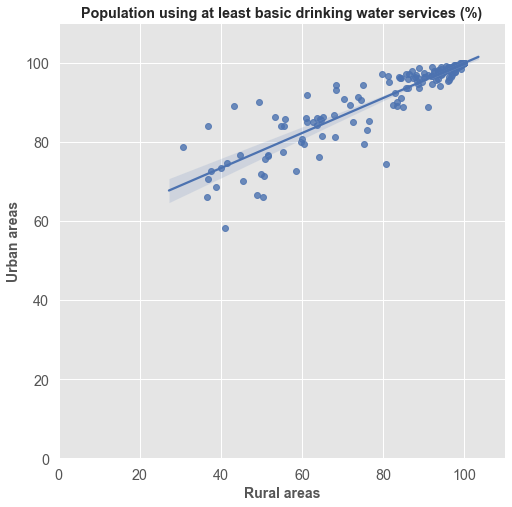

In [72]:
# Basic drinking water
plot_regression(df_w_avg, 'basic', 'ggplot', 'b', 'at least basic drinking water')

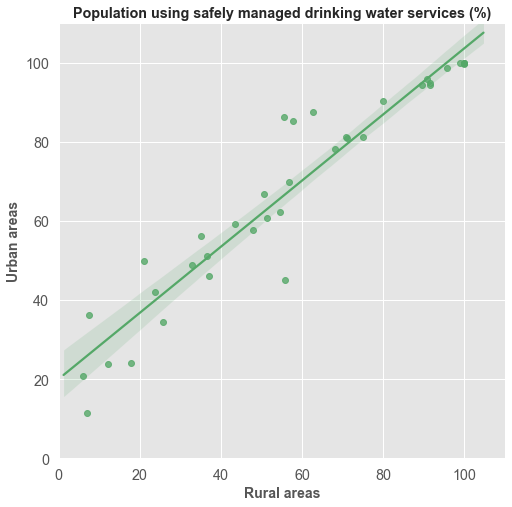

In [73]:
# Safely managed drinking water
plot_regression(df_w_avg, 'safe', 'ggplot', 'g', 'safely managed drinking water')

#### Matching countries with the region in our dataset for Wtaer and Sanitation

Regional data are not anailable for water and sanitation. Thus, we need to match the countries to their associated regions.

In [74]:
# Reading a list of country-region pairs
countries_region = pd.read_csv(country_to_region_url)
df = countries_region[['REGION (DISPLAY)','COUNTRY (DISPLAY)']]
df.drop_duplicates(inplace = True)
df.columns = ['region', 'country']
df.head()

C:\Users\Ali\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,region,country
0,Europe,Albania
18,Europe,Andorra
36,Europe,Armenia
54,Western Pacific,Australia
72,Europe,Austria


#### Matching the regions with Water data

In [75]:
df_w_region = copy.deepcopy(df_w)
df_w_region.reset_index(inplace = True)
df_w_region.head()

country level_1 basic              safe            
                       rural total urban rural total urban
0  Afghanistan    2000  28.0  22.0  49.0   NaN   NaN   NaN
1  Afghanistan    2001  28.0  22.0  49.0   NaN   NaN   NaN
2  Afghanistan    2002  30.0  24.0  52.0   NaN   NaN   NaN
3  Afghanistan    2003  32.0  26.0  54.0   NaN   NaN   NaN
4  Afghanistan    2004  34.0  28.0  57.0   NaN   NaN   NaN

In [76]:
df_wr = df_w_region.merge(df, on = 'country', how = 'left')
df_wr.head()

C:\Users\Ali\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,country,"(country, )","(level_1, )","(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)",region
0,Afghanistan,Afghanistan,2000,28.0,22.0,49.0,NaN,NaN,NaN,Eastern Mediterranean
1,Afghanistan,Afghanistan,2001,28.0,22.0,49.0,NaN,NaN,NaN,Eastern Mediterranean
2,Afghanistan,Afghanistan,2002,30.0,24.0,52.0,NaN,NaN,NaN,Eastern Mediterranean
3,Afghanistan,Afghanistan,2003,32.0,26.0,54.0,NaN,NaN,NaN,Eastern Mediterranean
4,Afghanistan,Afghanistan,2004,34.0,28.0,57.0,NaN,NaN,NaN,Eastern Mediterranean


In [77]:
df_wr = df_wr.set_index(['region'])
df_wr.head()

,country,"(country, )","(level_1, )","(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)"
region,,,,,,,,,
Eastern Mediterranean,Afghanistan,Afghanistan,2000,28.0,22.0,49.0,NaN,NaN,NaN
Eastern Mediterranean,Afghanistan,Afghanistan,2001,28.0,22.0,49.0,NaN,NaN,NaN
Eastern Mediterranean,Afghanistan,Afghanistan,2002,30.0,24.0,52.0,NaN,NaN,NaN
Eastern Mediterranean,Afghanistan,Afghanistan,2003,32.0,26.0,54.0,NaN,NaN,NaN
Eastern Mediterranean,Afghanistan,Afghanistan,2004,34.0,28.0,57.0,NaN,NaN,NaN


In [78]:
df_wr.drop(df_wr.iloc[:, 0:2], axis = 1, inplace = True)
df_wr.columns = ['year', 'basic_rural', 'basic_total', 'basic_urban', 'safe_rural', 'safe_total', 'safe_urban']
df_wr.head()

,year,basic_rural,basic_total,basic_urban,safe_rural,safe_total,safe_urban
region,,,,,,,
Eastern Mediterranean,2000,28.0,22.0,49.0,NaN,NaN,NaN
Eastern Mediterranean,2001,28.0,22.0,49.0,NaN,NaN,NaN
Eastern Mediterranean,2002,30.0,24.0,52.0,NaN,NaN,NaN
Eastern Mediterranean,2003,32.0,26.0,54.0,NaN,NaN,NaN
Eastern Mediterranean,2004,34.0,28.0,57.0,NaN,NaN,NaN


In [79]:
df_wr.reset_index(inplace = True)
df_wrsc = df_wr.iloc[:,2:].groupby(df_wr.region).mean()
df_wrsc

,basic_rural,basic_total,basic_urban,safe_rural,safe_total,safe_urban
region,,,,,,
Africa,62.093637,48.262577,83.006135,19.119048,7.976190,47.203704
Americas,92.631068,81.090909,96.974359,70.867299,39.388889,81.476852
Eastern Mediterranean,83.379310,65.677291,87.800797,76.111675,45.472222,72.791667
Europe,96.817603,94.974642,98.604324,87.225946,70.476190,92.378205
South-East Asia,86.061224,82.683673,93.846939,45.583333,39.855556,58.911111
Western Pacific,87.402490,80.180124,94.256983,64.102804,17.148148,67.856000


#### Compare between Rural and Urban areas for each continent

In [80]:
df_wrsc_basic = df_wrsc.iloc[:, 0:3]
df_wrsc_basic

,basic_rural,basic_total,basic_urban
region,,,
Africa,62.093637,48.262577,83.006135
Americas,92.631068,81.090909,96.974359
Eastern Mediterranean,83.379310,65.677291,87.800797
Europe,96.817603,94.974642,98.604324
South-East Asia,86.061224,82.683673,93.846939
Western Pacific,87.402490,80.180124,94.256983


In [81]:
df_wrsc_safe = df_wrsc.iloc[:, 3:]
df_wrsc_safe

,safe_rural,safe_total,safe_urban
region,,,
Africa,19.119048,7.976190,47.203704
Americas,70.867299,39.388889,81.476852
Eastern Mediterranean,76.111675,45.472222,72.791667
Europe,87.225946,70.476190,92.378205
South-East Asia,45.583333,39.855556,58.911111
Western Pacific,64.102804,17.148148,67.856000


In [82]:
df_wrsc_basic.drop(list(df_wrsc_basic.columns)[1], axis = 1, inplace = True)
df_wrsc_basic.columns = ['rural', 'urban']
df_wrsc_basic = df_wrsc_basic.stack()
df_wrsc_basic

C:\Users\Ali\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


region                      
Africa                 rural    62.093637
                       urban    83.006135
Americas               rural    92.631068
                       urban    96.974359
Eastern Mediterranean  rural    83.379310
                       urban    87.800797
Europe                 rural    96.817603
                       urban    98.604324
South-East Asia        rural    86.061224
                       urban    93.846939
Western Pacific        rural    87.402490
                       urban    94.256983
dtype: float64

In [83]:
df_wrsc_safe.drop(list(df_wrsc_safe.columns)[1], axis = 1, inplace = True)
df_wrsc_safe.columns = ['rural', 'urban']
df_wrsc_safe = df_wrsc_safe.stack()
df_wrsc_safe

region                      
Africa                 rural    19.119048
                       urban    47.203704
Americas               rural    70.867299
                       urban    81.476852
Eastern Mediterranean  rural    76.111675
                       urban    72.791667
Europe                 rural    87.225946
                       urban    92.378205
South-East Asia        rural    45.583333
                       urban    58.911111
Western Pacific        rural    64.102804
                       urban    67.856000
dtype: float64

> A function to plot the bar charts

In [240]:
def plot_barchart(df, style, title):
    fig, ax = plt.subplots(figsize = [10,6])
    sns.set(font_scale = 1.3)
    plt.style.use(style)
    ax = sns.barplot(x = df.index.get_level_values(0), \
                     y = df.values, hue = df.index.get_level_values(1))
    ax.set_title('Population using {0} services'.format(title), fontsize = 17, fontweight = 'bold')
    ax.set_ylabel('Population (%)', fontsize = 15, fontweight = 'bold')
    ax.set_xlabel('Region', fontsize = 15, fontweight = 'bold')
    ax.set_ylim([0, 100]) 
    plt.xticks(rotation = 30)
    plt.show()

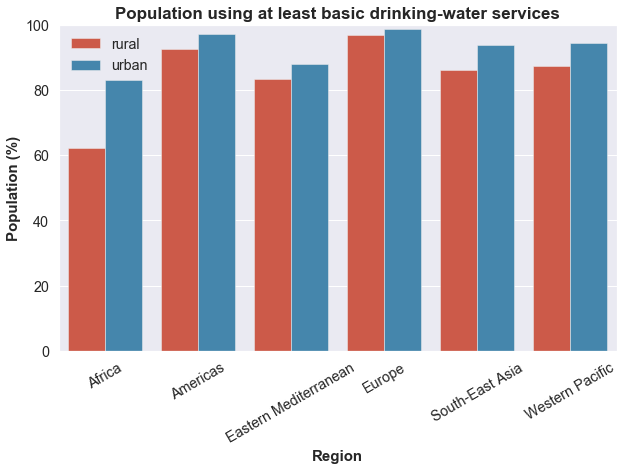

In [241]:
# Basic drinking water
plot_barchart(df_wrsc_basic, 'ggplot','at least basic drinking-water')

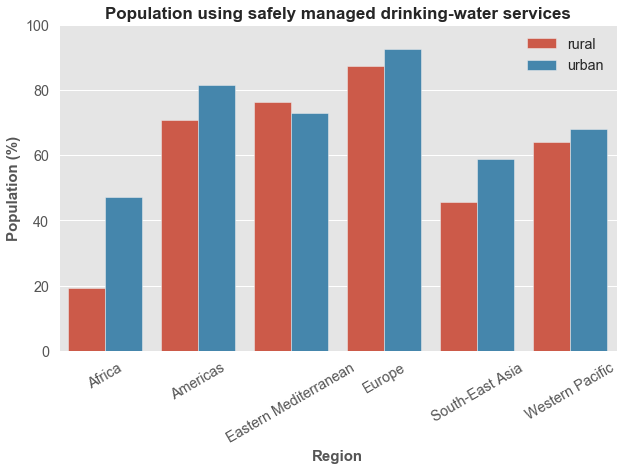

In [242]:
# Safely managed drinking water
plot_barchart(df_wrsc_safe, 'ggplot','safely managed drinking-water')

#### Trend over time plots for diferent continents

In [87]:
df_wrst = copy.deepcopy(df_wr)
df_wrst.set_index(['region', 'year'], inplace = True)
df_wrst.columns = ['basic_rural', 'basic_total', 'basic_urban', 'safe_rural', 'safe_total', 'safe_urban']
df_wrst = df_wrst.groupby([df_wrst.index.get_level_values(0),df_wrst.index.get_level_values(1)]).mean()
df_wrst

basic_rural  basic_total  basic_urban  safe_rural  \
region          year                                                      
Africa          2000    56.782609    43.266667    80.666667   14.857143   
                2001    57.304348    43.844444    80.844444   15.142857   
                2002    58.021739    44.333333    81.200000   15.428571   
                2003    58.543478    44.911111    81.466667   15.714286   
                2004    59.304348    45.577778    81.755556   16.428571   
...                           ...          ...          ...         ...   
Western Pacific 2013    89.259259    82.611111    95.750000   65.750000   
                2014    89.518519    83.277778    96.150000   66.166667   
                2015    89.962963    83.833333    96.450000   66.500000   
                2016    90.333333    84.388889    96.750000   66.666667   
                2017    90.666667    84.777778    97.100000   66.833333   

                      safe_total  safe_urban  
region          year                          
Africa          2000    5.285714   42.733333  
                2001    5.285714   43.133333  
                2002    5.571429   43.666667  
                2003    5.714286   44.133333  
                2004    6.142857   44.600000  
...                          ...         ...  
Western Pacific 2013   19.333333   68.714286  
                2014   19.666667   68.857143  
                2015   19.666667   69.000000  
                2016   19.666667   69.142857  
                2017   20.666667   69.285714  

[108 rows x 6 columns]

In [88]:
global regions1, years1
regions1 = list(df_wrst.index.levels[0])
years1 = [str(x) for x in list(df_wrst.index.levels[1])]

def plot_trend(df, col, group, area, style = 'seaborn-paper', legend_loc = 'lower right', leg_x = 0, leg_y = 0):
    '''A function to plot the trend over time across different regions'''
    plt.style.use(style)
    fig, ax = plt.subplots(figsize = (11,7))
    for r in regions1:
        plt.plot(years1, df.loc[r, col], 'o-', label = r)
    plt.ylim([0, 100])
    plt.xticks(rotation = 60, fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.ylabel('Population (%)', fontsize = 16, fontweight = 'bold')
    plt.xlabel('Year', fontsize = 16, fontweight = 'bold')
    plt.title('Population (%) using {0} services in {1} areas'\
              .format(group, area), fontsize = 16, fontweight = 'bold')
    plt.legend(fontsize = 15, loc = legend_loc, bbox_to_anchor = (leg_x, leg_y))
    plt.tight_layout()

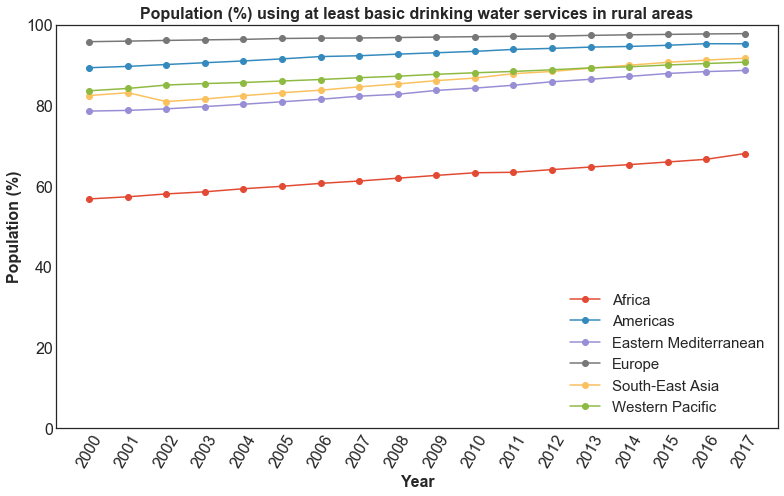

In [89]:
# Basic - Rural
plot_trend(df_wrst, 'basic_rural' ,'at least basic drinking water', 'rural', 'seaborn-white'\
           ,'lower right', 1, 0)

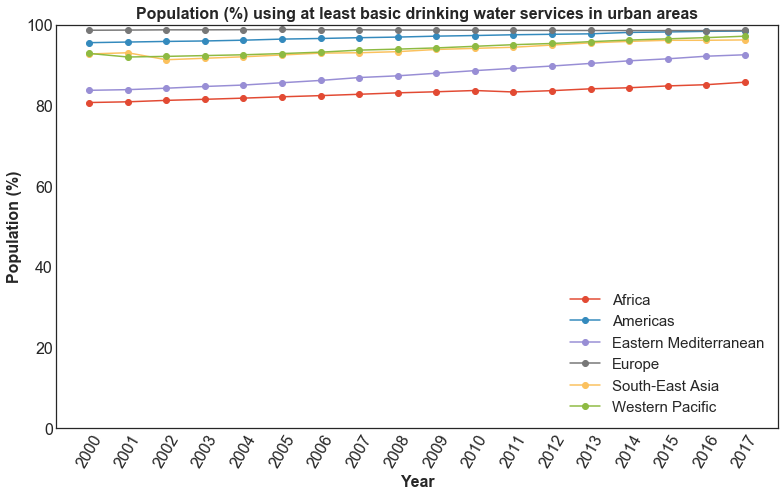

In [90]:
# Basic - Urban
plot_trend(df_wrst, 'basic_urban', 'at least basic drinking water', 'urban', 'seaborn-white',\
           'lower right', 1, 0)

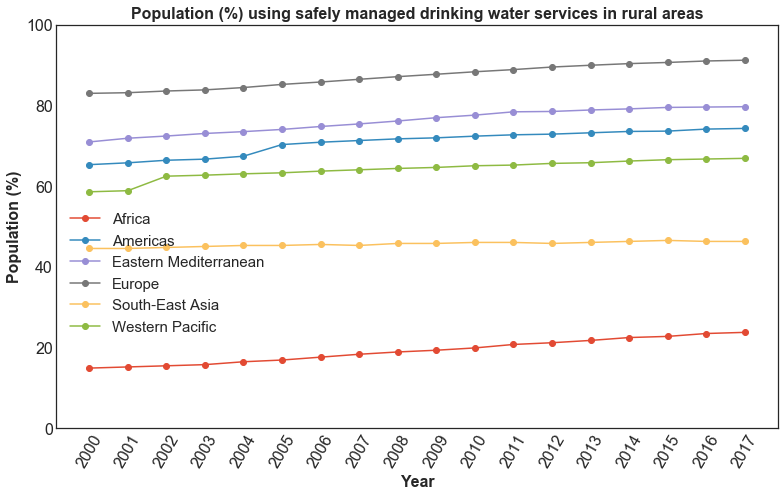

In [91]:
# Safely managed - Rural
plot_trend(df_wrst, 'safe_rural', 'safely managed drinking water', 'rural', 'seaborn-white', 'lower left', 0, .2)

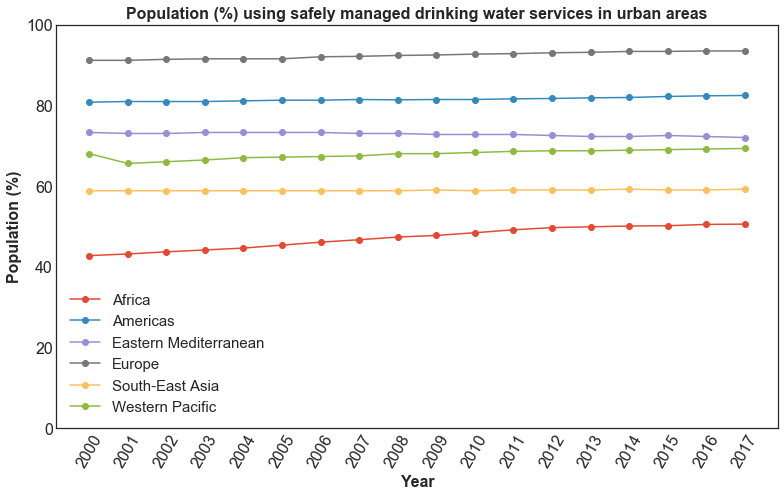

In [92]:
# Safely managed - Urban
plot_trend(df_wrst, 'safe_urban', 'safely managed drinking water', 'urban', 'seaborn-white',\
           'lower left', 0, 0)

### Q2
Percentage of population by country that is using basic sanitation or safely managed
sanitation services over the years by urban and rural areas. Is there a difference by
World region and urban vs rural area?

>Repeat the procedure for Q1 after cleaning up 

In [93]:
# cleaned sanitation data
df_s.head()

basic              safe            
                 rural total urban rural total urban
country                                             
Afghanistan 2000    24    22    30   NaN   NaN   NaN
            2001    24    22    30   NaN   NaN   NaN
            2002    25    23    31   NaN   NaN   NaN
            2003    26    24    33   NaN   NaN   NaN
            2004    27    25    35   NaN   NaN   NaN

In [94]:
df_s.dtypes

basic  rural    object
       total    object
       urban    object
safe   rural    object
       total    object
       urban    object
dtype: object

In [95]:
df_s = df_s.astype('float')
df_s.dtypes

basic  rural    float64
       total    float64
       urban    float64
safe   rural    float64
       total    float64
       urban    float64
dtype: object

In [96]:
# To check if all countries include data for the same numbe rof years
df_s.index.get_level_values(0).value_counts()

Seychelles                            18
Yemen                                 18
Democratic Republic of the Congo      18
Gambia                                18
Argentina                             18
                                      ..
Venezuela (Bolivarian Republic of)    13
Montenegro                            12
Italy                                 12
Brunei Darussalam                      9
South Sudan                            7
Name: country, Length: 194, dtype: int64

In [97]:
# To average across all years for each country and save the results into a new dataframe
df_s_avg = df_s.groupby([df_s.index.get_level_values(0)]).mean().round(2)
df_s_avg.head()

basic                   safe              
              rural   total   urban  rural  total  urban
country                                                 
Afghanistan   32.61   28.94   44.06    NaN    NaN    NaN
Albania       94.17   90.89   97.67  38.78  37.44  40.00
Algeria       86.06   77.83   90.44  18.11  20.11  17.17
Andorra      100.00  100.00  100.00  69.44  69.44  69.44
Angola        39.06   15.33   55.61    NaN    NaN    NaN

#### Scatter plots with regression
Using the same plotting function as used for water availability data

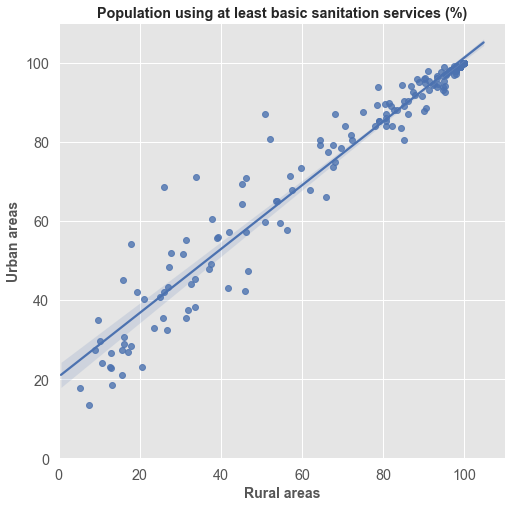

In [98]:
# Basic drinking water
plot_regression(df_s_avg, 'basic', 'ggplot', 'b', 'at least basic sanitation')

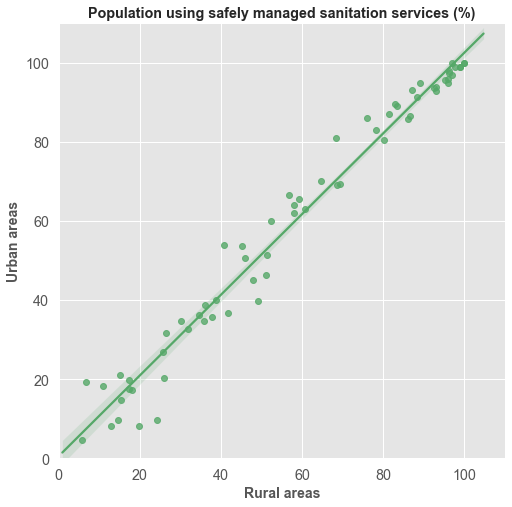

In [99]:
# Safely managed drinking water
plot_regression(df_s_avg, 'safe', 'ggplot', 'g', 'safely managed sanitation')

#### Matching the regions with Sanitation data

In [100]:
df_s_region = copy.deepcopy(df_s)
df_s_region.reset_index(inplace = True)
df_s_region.head()

country level_1 basic              safe            
                       rural total urban rural total urban
0  Afghanistan    2000  24.0  22.0  30.0   NaN   NaN   NaN
1  Afghanistan    2001  24.0  22.0  30.0   NaN   NaN   NaN
2  Afghanistan    2002  25.0  23.0  31.0   NaN   NaN   NaN
3  Afghanistan    2003  26.0  24.0  33.0   NaN   NaN   NaN
4  Afghanistan    2004  27.0  25.0  35.0   NaN   NaN   NaN

In [101]:
df_sr = df_s_region.merge(df, on = 'country', how = 'left')
df_sr.head()

C:\Users\Ali\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,country,"(country, )","(level_1, )","(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)",region
0,Afghanistan,Afghanistan,2000,24.0,22.0,30.0,NaN,NaN,NaN,Eastern Mediterranean
1,Afghanistan,Afghanistan,2001,24.0,22.0,30.0,NaN,NaN,NaN,Eastern Mediterranean
2,Afghanistan,Afghanistan,2002,25.0,23.0,31.0,NaN,NaN,NaN,Eastern Mediterranean
3,Afghanistan,Afghanistan,2003,26.0,24.0,33.0,NaN,NaN,NaN,Eastern Mediterranean
4,Afghanistan,Afghanistan,2004,27.0,25.0,35.0,NaN,NaN,NaN,Eastern Mediterranean


In [102]:
df_sr = df_sr.set_index(['region'])
df_sr.head()

,country,"(country, )","(level_1, )","(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)"
region,,,,,,,,,
Eastern Mediterranean,Afghanistan,Afghanistan,2000,24.0,22.0,30.0,NaN,NaN,NaN
Eastern Mediterranean,Afghanistan,Afghanistan,2001,24.0,22.0,30.0,NaN,NaN,NaN
Eastern Mediterranean,Afghanistan,Afghanistan,2002,25.0,23.0,31.0,NaN,NaN,NaN
Eastern Mediterranean,Afghanistan,Afghanistan,2003,26.0,24.0,33.0,NaN,NaN,NaN
Eastern Mediterranean,Afghanistan,Afghanistan,2004,27.0,25.0,35.0,NaN,NaN,NaN


In [103]:
df_sr.drop(df_sr.iloc[:, 0:2], axis = 1, inplace = True)
df_sr.columns = ['year', 'basic_rural', 'basic_total', 'basic_urban', 'safe_rural', 'safe_total', 'safe_urban']
df_sr.head()

,year,basic_rural,basic_total,basic_urban,safe_rural,safe_total,safe_urban
region,,,,,,,
Eastern Mediterranean,2000,24.0,22.0,30.0,NaN,NaN,NaN
Eastern Mediterranean,2001,24.0,22.0,30.0,NaN,NaN,NaN
Eastern Mediterranean,2002,25.0,23.0,31.0,NaN,NaN,NaN
Eastern Mediterranean,2003,26.0,24.0,33.0,NaN,NaN,NaN
Eastern Mediterranean,2004,27.0,25.0,35.0,NaN,NaN,NaN


In [104]:
df_sr.dtypes

year             int64
basic_rural    float64
basic_total    float64
basic_urban    float64
safe_rural     float64
safe_total     float64
safe_urban     float64
dtype: object

In [105]:
df_sr.iloc[:, 1:] = df_sr.iloc[:, 1:].astype('float64')

In [106]:
df_sr.reset_index(inplace = True)
df_srsc = df_sr.iloc[:,2:].groupby(df_sr.region).mean()
df_srsc

,basic_rural,basic_total,basic_urban,safe_rural,safe_total,safe_urban
region,,,,,,
Africa,33.094838,23.883436,42.930061,15.246032,12.469136,18.590278
Americas,81.692557,68.922912,84.925214,43.109005,60.574074,44.277778
Eastern Mediterranean,77.661376,56.226190,79.694444,61.675214,26.305556,57.992063
Europe,95.335813,92.732597,96.889491,75.127024,82.215385,74.812147
South-East Asia,63.082474,57.644330,73.865979,NaN,20.019231,NaN
Western Pacific,74.850526,62.348684,82.835294,65.111675,34.921348,50.887850


#### Compare between Rural and Urban areas for each region

In [107]:
df_srsc_basic = df_srsc.iloc[:, 0:3]
df_srsc_basic

,basic_rural,basic_total,basic_urban
region,,,
Africa,33.094838,23.883436,42.930061
Americas,81.692557,68.922912,84.925214
Eastern Mediterranean,77.661376,56.226190,79.694444
Europe,95.335813,92.732597,96.889491
South-East Asia,63.082474,57.644330,73.865979
Western Pacific,74.850526,62.348684,82.835294


In [108]:
df_srsc_safe = df_srsc.iloc[:, 3:]
df_srsc_safe

,safe_rural,safe_total,safe_urban
region,,,
Africa,15.246032,12.469136,18.590278
Americas,43.109005,60.574074,44.277778
Eastern Mediterranean,61.675214,26.305556,57.992063
Europe,75.127024,82.215385,74.812147
South-East Asia,NaN,20.019231,NaN
Western Pacific,65.111675,34.921348,50.887850


In [109]:
df_srsc_basic.drop(list(df_srsc_basic.columns)[1], axis = 1, inplace = True)
df_srsc_basic.columns = ['rural', 'urban']
df_srsc_basic = df_srsc_basic.stack()
df_srsc_basic

C:\Users\Ali\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


region                      
Africa                 rural    33.094838
                       urban    42.930061
Americas               rural    81.692557
                       urban    84.925214
Eastern Mediterranean  rural    77.661376
                       urban    79.694444
Europe                 rural    95.335813
                       urban    96.889491
South-East Asia        rural    63.082474
                       urban    73.865979
Western Pacific        rural    74.850526
                       urban    82.835294
dtype: float64

In [110]:
df_srsc_safe.drop(list(df_srsc_safe.columns)[1], axis = 1, inplace = True)
df_srsc_safe.columns = ['rural', 'urban']
df_srsc_safe = df_srsc_safe.stack()
df_srsc_safe

region                      
Africa                 rural    15.246032
                       urban    18.590278
Americas               rural    43.109005
                       urban    44.277778
Eastern Mediterranean  rural    61.675214
                       urban    57.992063
Europe                 rural    75.127024
                       urban    74.812147
Western Pacific        rural    65.111675
                       urban    50.887850
dtype: float64

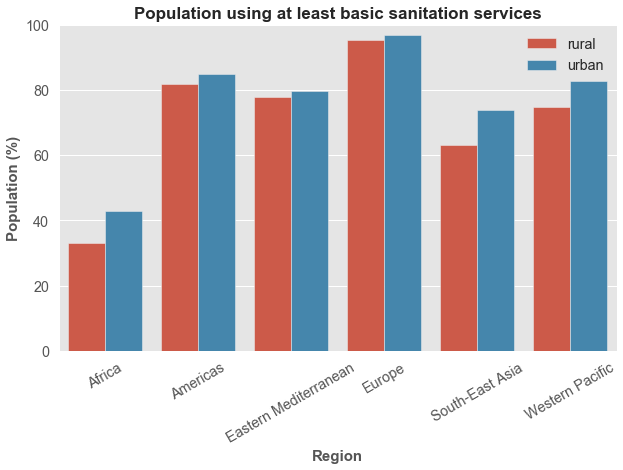

In [243]:
# Basic sanitation
plot_barchart(df_srsc_basic, 'ggplot','at least basic sanitation')

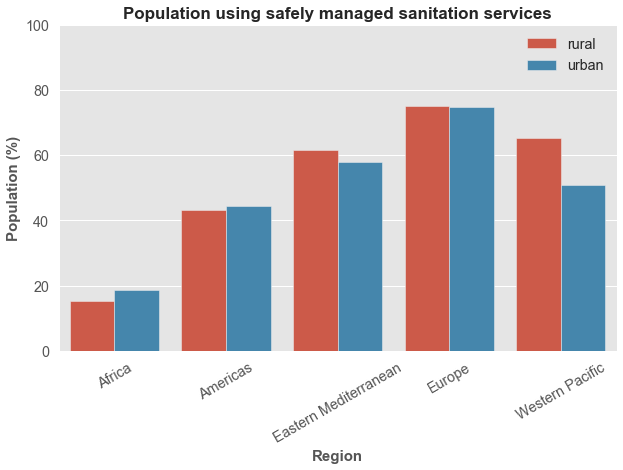

In [244]:
# Safely-managed sanitation
plot_barchart(df_srsc_safe, 'ggplot','safely managed sanitation')

#### Trend over time plots for diferent continents

In [113]:
df_srst = copy.deepcopy(df_sr)
df_srst.set_index(['region', 'year'], inplace = True)
df_srst.columns = ['basic_rural', 'basic_total', 'basic_urban', 'safe_rural', 'safe_total', 'safe_urban']
df_srst = df_srst.groupby([df_srst.index.get_level_values(0),df_srst.index.get_level_values(1)]).mean()
df_srst

basic_rural  basic_total  basic_urban  safe_rural  \
region          year                                                      
Africa          2000    28.347826    19.844444    39.511111   11.571429   
                2001    28.847826    20.355556    39.977778   12.000000   
                2002    29.478261    20.822222    40.355556   12.428571   
                2003    30.086957    21.222222    40.844444   12.714286   
                2004    30.695652    21.822222    41.288889   13.285714   
...                           ...          ...          ...         ...   
Western Pacific 2013    78.111111    66.058824    84.368421   68.272727   
                2014    78.814815    66.823529    84.736842   69.090909   
                2015    79.370370    67.529412    85.105263   70.000000   
                2016    79.192308    68.235294    85.473684   70.818182   
                2017    79.538462    68.764706    85.473684   71.727273   

                      safe_total  safe_urban  
region          year                          
Africa          2000    8.333333   16.000000  
                2001    8.777778   16.250000  
                2002    9.222222   16.750000  
                2003    9.888889   17.125000  
                2004   10.333333   17.375000  
...                          ...         ...  
Western Pacific 2013   39.600000   53.666667  
                2014   40.800000   54.666667  
                2015   42.000000   55.166667  
                2016   43.200000   56.166667  
                2017   44.600000   57.000000  

[108 rows x 6 columns]

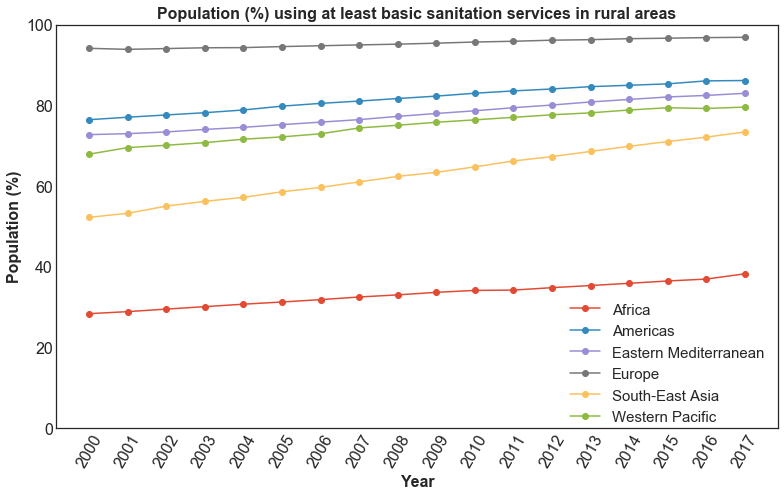

In [114]:
# Basic - Rural
plot_trend(df_srst,'basic_rural', 'at least basic sanitation', 'rural', 'seaborn-white',\
           'center right', 1, 0.16)

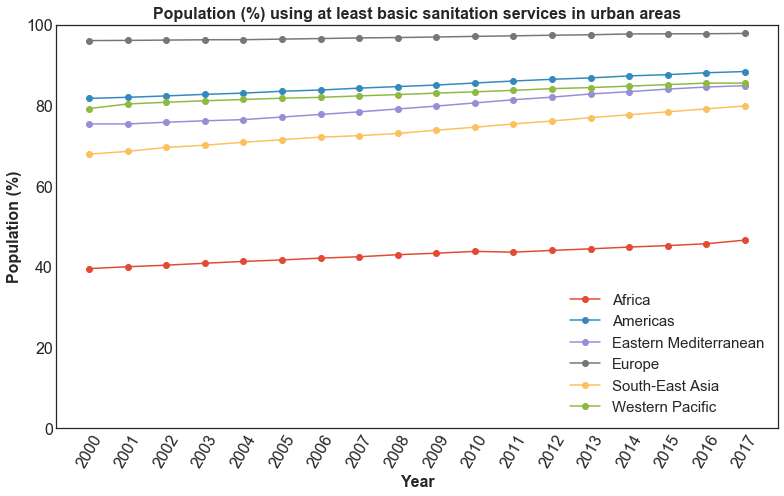

In [115]:
# Basic - urban
plot_trend(df_srst, 'basic_urban', 'at least basic sanitation', 'urban', 'seaborn-white',\
           'lower right', 1, 0)

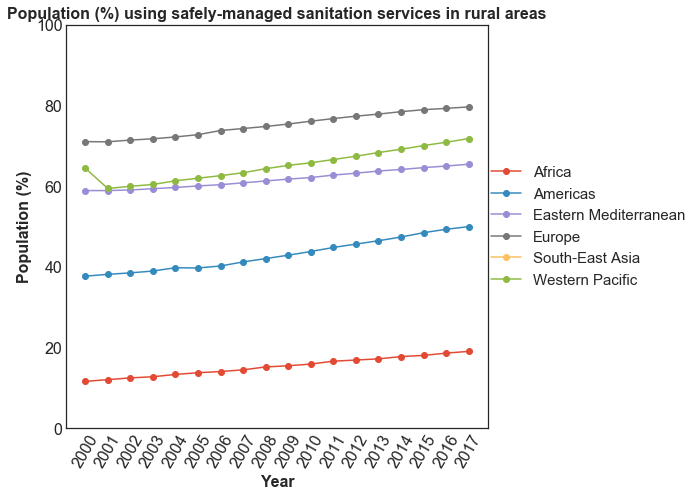

In [116]:
# Safely managed - Rural
plot_trend(df_srst, 'safe_rural', 'safely-managed sanitation', 'rural', 'seaborn-white', 'center right', 1.5, 0.5)

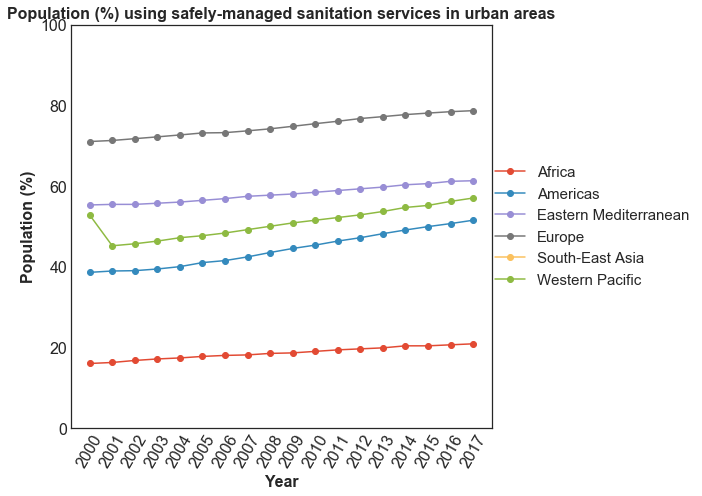

In [117]:
# Safely managed - Urban
plot_trend(df_srst, 'safe_urban', 'safely-managed sanitation', 'urban', 'seaborn-white', 'center right', 1.5, 0.5)

### Q3
Children <5 years of age malnutrition information (weight as proxy - underweight,
overweight, stunted) by country (or regions). What trends do we see?

In [118]:
df_c

,country,year,wasted,overweight,stunted,underweight
0,Afghanistan,2013,9.5,5.4,40.9,25.0
1,Afghanistan,2004,8.6,4.6,59.3,32.9
2,Afghanistan,1997,18.2,6.5,53.2,44.9
3,Albania,2018,1.6,16.4,11.3,1.5
4,Albania,2009,9.6,23.2,23.2,6.3
...,...,...,...,...,...,...
844,Zimbabwe,2006,7.3,8.8,35.3,14.0
845,Zimbabwe,1999,8.3,10.5,33.8,11.5
846,Zimbabwe,1994,5.3,6.4,28.5,11.8
847,Zimbabwe,1988,1.7,5.4,31.0,8.0


### Create geo-heat maps

#### Read the world map

In [119]:
# Read the wold map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs('+proj=robin')
world = world[world.name != 'Antarctica']
world = world.rename(columns = {'name':'country'})
world.head()

,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((16810130.626 -1718409.644, 167..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3202917.599 -101604.324, 3218827.080..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-791398.083 2957886.876, -791499.326..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -10..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99..."


In [120]:
world

,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((16810130.626 -1718409.644, 167..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3202917.599 -101604.324, 3218827.080..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-791398.083 2957886.876, -791499.326..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -10..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((1585599.314 4900532.058, 1585600.383..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((1723422.916 4550777.201, 1701164.495..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((1775267.006 4473185.031, 1765920.345..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-5796692.599 1150802.640, -5741973.2..."


In [121]:
# Averaging over all records (i.e across all years) for each country before merging with the geological data
df_c_avg = df_c.groupby('country').mean().round(2)
df_c_avg

,wasted,overweight,stunted,underweight
country,,,,
Afghanistan,12.10,5.50,51.13,34.27
Albania,7.76,20.78,24.16,7.70
Algeria,5.93,12.83,19.64,7.39
Angola,7.23,2.50,42.83,23.87
Argentina,2.33,11.50,10.73,2.90
...,...,...,...,...
Venezuela (Bolivarian Republic of),4.33,5.41,16.96,4.24
Viet Nam,9.06,3.03,36.99,24.70
Yemen,15.52,4.62,51.45,37.55


#### Join the malnutrition data on country

In [122]:
df_world = world.merge(df_c_avg, on = 'country', how = 'left')
df_world.head()

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,wasted,overweight,stunted,underweight
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((16810130.626 -1718409.644, 167...",8.05,3.65,5.90,6.10
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3202917.599 -101604.324, 3218827.080...",NaN,NaN,NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-791398.083 2957886.876, -791499.326...",NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -10...",NaN,10.40,NaN,NaN
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",0.51,7.41,2.91,0.88


##### A function for geo-heat map plots

In [123]:
def plot_map_malnutrition(df, group):
    ''' A function to plot geographical heeat maps for children malnutrition per country'''
    # Filter data: NaNs mean that there are no data available for that country
    known = df.dropna(subset = [group])
    ax = df.plot(color = 'white', edgecolor = '#aaaaaa', figsize = (20,12))
    known.plot(column = group, ax = ax, cmap = 'YlOrRd', figsize = (20, 12), \
                    scheme = 'fisher_jenks', k = 9, legend = True, edgecolor = '#aaaaaa')
    description1 = '''% {0} per country'''.format(str.capitalize(group)).strip()
    ax.annotate(description1, xy = (0.07, 0.18), size = 15, xycoords = 'figure fraction')
    description2 = '''NOTE: countries with no data available are shown in plain white color'''.strip()
    ax.annotate(description2, xy = (0.07, 0.12), size = 15, xycoords = 'figure fraction')
    ax.set_axis_off()
    ax.set_title('Children aged <5 years {0} (% per country)'.format(group), fontsize = 17, fontweight = 'bold')
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((.11, .5))
    legend.prop.set_size(15)

#### Underweight

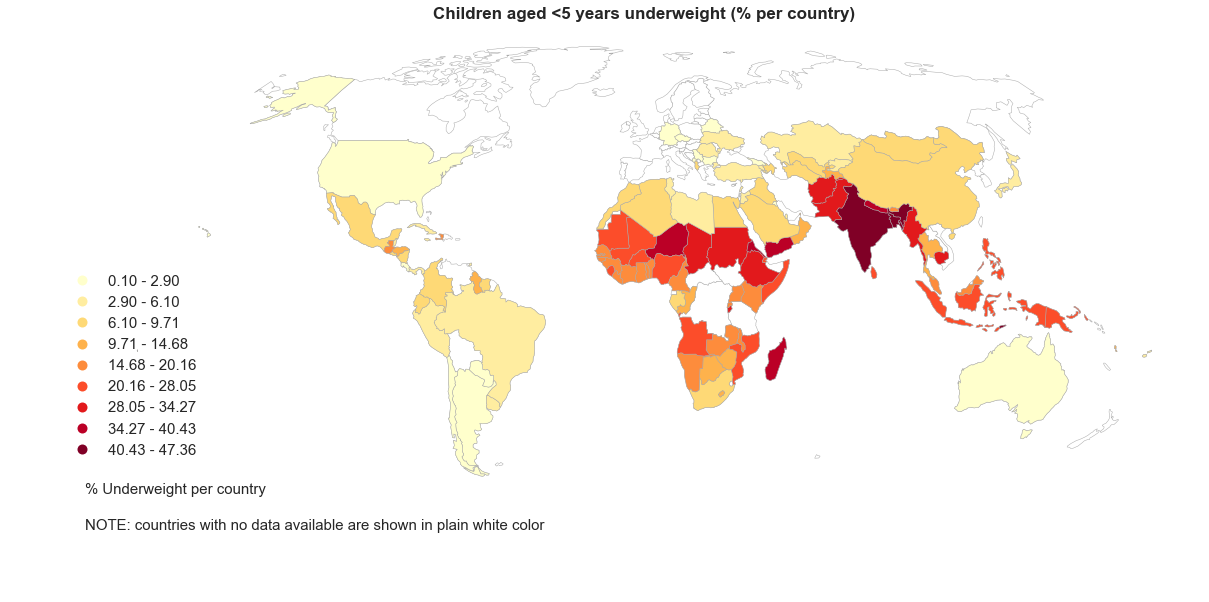

In [124]:
plot_map_malnutrition(df_world, 'underweight')

#### Overweight

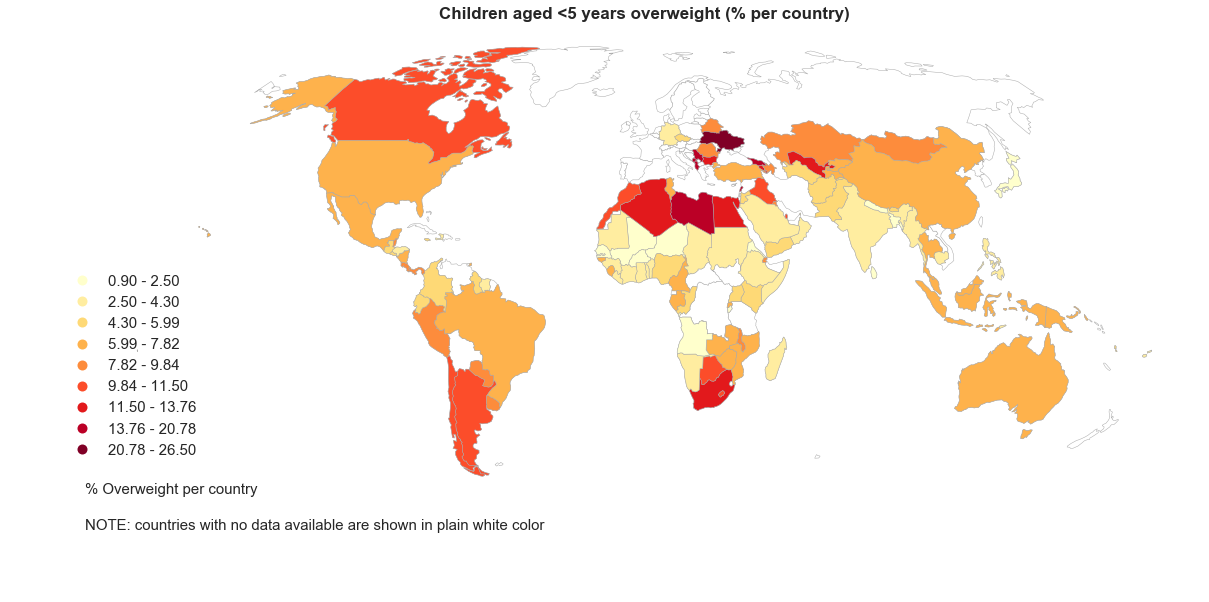

In [125]:
plot_map_malnutrition(df_world, 'overweight')

#### Stunted

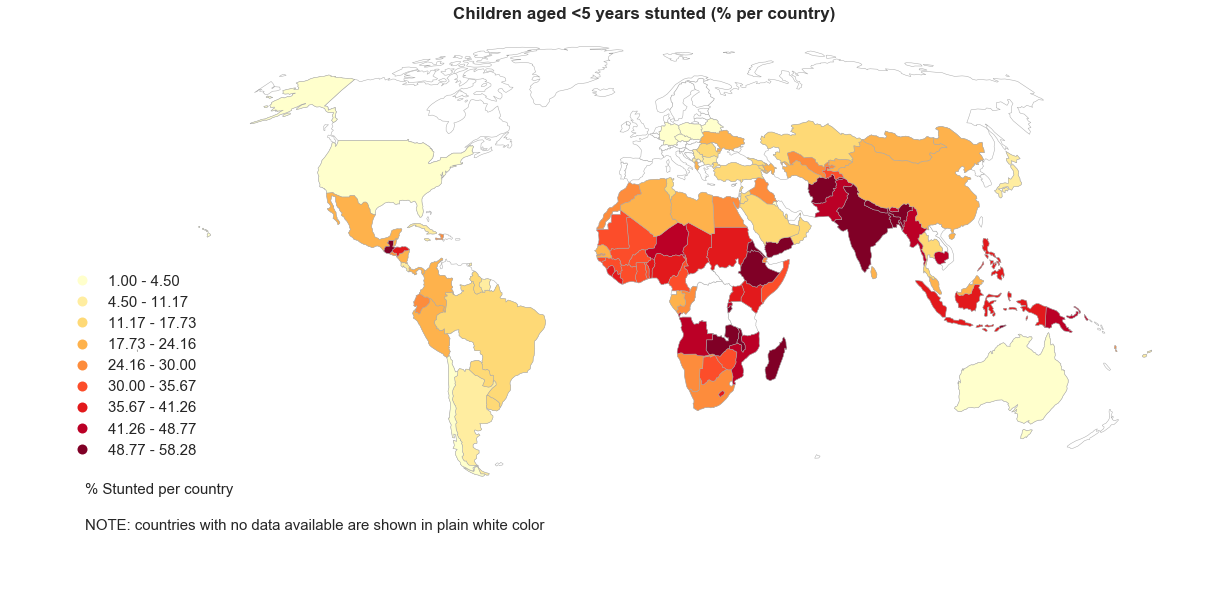

In [126]:
plot_map_malnutrition(df_world, 'stunted')

### Q4
Children < 5 years old mortality rate by region and gender.

In [127]:
# By region data
df_m2

neonatal_both  under5_both  under5_female  \
region          year                                                    
Global          1990-01-01           36.7         93.2           90.5   
                1991-01-01           36.3         92.0           89.4   
                1992-01-01           35.8         90.8           88.3   
                1993-01-01           35.4         89.6           87.1   
                1994-01-01           34.9         88.5           86.1   
...                                   ...          ...            ...   
Western Pacific 2014-01-01            7.2         14.4           13.1   
                2015-01-01            6.8         13.7           12.5   
                2016-01-01            6.5         13.0           11.9   
                2017-01-01            6.1         12.4           11.3   
                2018-01-01            5.8         11.8           10.8   

                            under5_male  
region          year                     
Global          1990-01-01         95.7  
                1991-01-01         94.4  
                1992-01-01         93.2  
                1993-01-01         91.9  
                1994-01-01         90.7  
...                                 ...  
Western Pacific 2014-01-01         15.5  
                2015-01-01         14.8  
                2016-01-01         14.1  
                2017-01-01         13.4  
                2018-01-01         12.8  

[203 rows x 4 columns]

In [128]:
regions = list(df_m2.index.levels[0])
years = [str(x.year) for x in list(df_m2.index.levels[1])]

In [129]:
regions.remove('Global')

In [130]:
regions

['Africa',
 'Americas',
 'Eastern Mediterranean',
 'Europe',
 'South-East Asia',
 'Western Pacific']

#### A function to plot mortality rate

In [131]:
def plot_mortality_rate(col, title, style = 'seaborn-white'):
    plt.style.use(style)
    fig, ax = plt.subplots(figsize = (11,7))
    for r in regions:
        plt.plot(years, df_m2.loc[r,col], 'o-', label = r)
    plt.xticks(years, rotation = 60, fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.ylabel('Mortality rate (per 1000 live births)', fontsize = 14, fontweight = 'bold')
    plt.xlabel('Year', fontsize = 14, fontweight = 'bold')
    plt.title('{0} mortality rate over time in different regions'.format(title), fontsize = 14.5, fontweight = 'bold')
    plt.legend(fontsize = 13)
    sns.set(font_scale=1.2)

##### Plotting the under 5 years mortality rate (all sexes) over time (1990 - 2018) in different regions

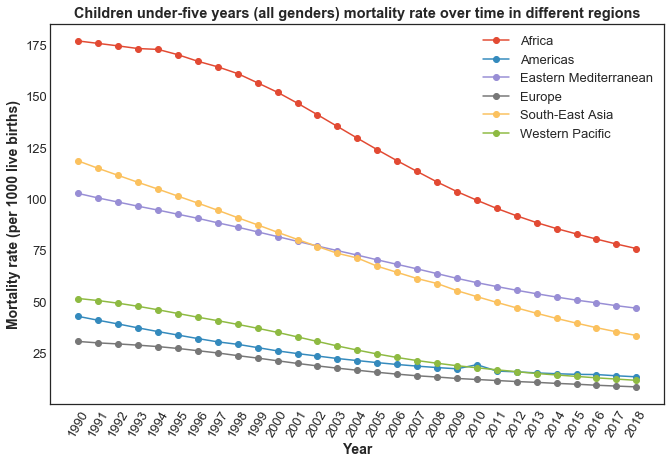

In [132]:
plot_mortality_rate('under5_both', 'Children under-five years (all genders)', 'seaborn-white')

##### Plotting the under 5 years mortality rate (male only) over time (1990 - 2018) in different regions

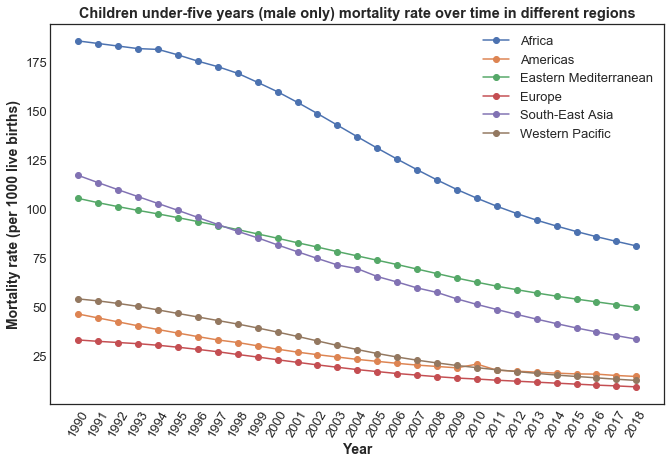

In [133]:
plot_mortality_rate('under5_male', 'Children under-five years (male only)', 'seaborn-white')

##### Plotting the under 5 years mortality rate (female only) over time (1990 - 2018) in different regions

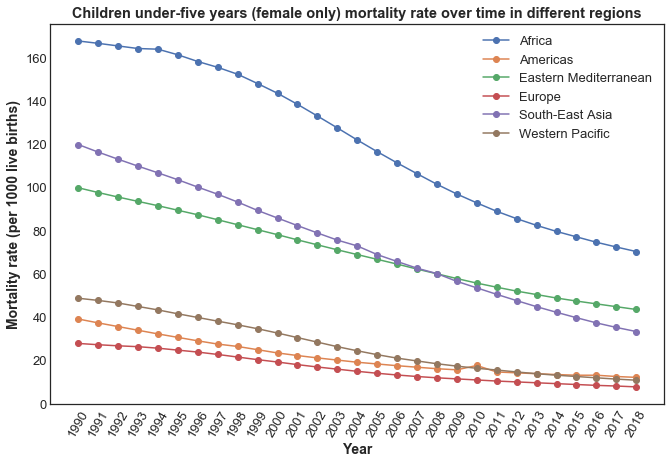

In [134]:
plot_mortality_rate('under5_female', 'Children under-five years (female only)', 'seaborn-white')

### Q5
Neonatal mortality rate by region.

##### Plotting neonatal mortality rate (all genders) over time (1990 - 2018) in different regions

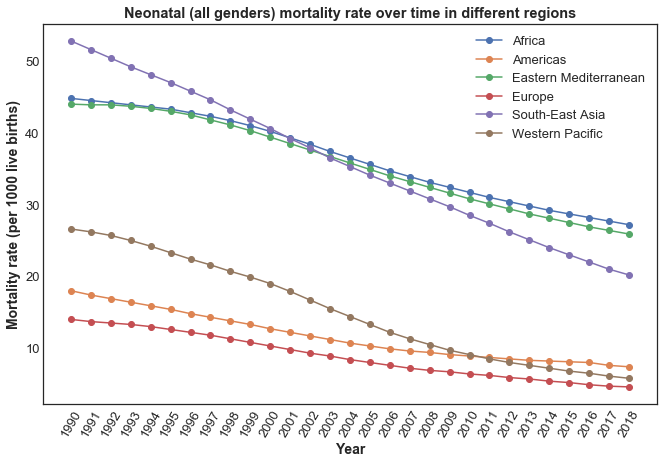

In [135]:
plot_mortality_rate('neonatal_both', 'Neonatal (all genders)', 'seaborn-white')

### Q6
Is there a correlation between children's health and drinking water?

  > #### PART 1: Mortality rate vs. Drinking water availability (country-based)

In [136]:
df_m_cntr.index.get_level_values(0).unique().shape

(194,)

In [137]:
df_w.index.get_level_values(0).unique().shape

(194,)

In [138]:
df_m_cntr = df_m_cntr.sort_index(level = 0, ascending = True)
df_m_cntr.head()

neonatal_both under5_both under5_male under5_female
country     year                                                     
Afghanistan  1961           NaN       350.9       359.2         341.9
             1962           NaN       345.3       353.5         336.7
             1963           NaN       340.1       348.2         331.7
             1964           NaN       334.9       342.8         326.5
             1965           NaN       329.6       337.2         321.4

In [139]:
df_w.head()

basic              safe            
                 rural total urban rural total urban
country                                             
Afghanistan 2000  28.0  22.0  49.0   NaN   NaN   NaN
            2001  28.0  22.0  49.0   NaN   NaN   NaN
            2002  30.0  24.0  52.0   NaN   NaN   NaN
            2003  32.0  26.0  54.0   NaN   NaN   NaN
            2004  34.0  28.0  57.0   NaN   NaN   NaN

In [140]:
# Looking at a specific country data
df_m_cntr.loc[(slice('Afghanistan'), slice(None)), :]

neonatal_both under5_both under5_male under5_female
country     year                                                     
Afghanistan  1961           NaN       350.9       359.2         341.9
             1962           NaN       345.3       353.5         336.7
             1963           NaN       340.1       348.2         331.7
             1964           NaN       334.9       342.8         326.5
             1965           NaN       329.6       337.2         321.4
             1966           NaN       324.3       331.7         316.3
             1967           NaN         319       326.3         311.3
             1968           NaN       313.6       320.8           306
             1969           NaN       308.1       315.1         300.7
             1970           NaN       302.7       309.6         295.4
             1971           NaN       297.2       304.1           290
             1972           NaN       291.7       298.4         284.5
             1973           NaN       285.9       292.7           279
             1974           NaN       280.4       286.8         273.6
             1975           NaN       274.6       280.7           268
             1976           NaN       268.7       274.6         262.3
             1977           NaN       262.9       268.6         256.7
             1978           NaN       256.7       262.6         250.6
             1979           NaN       250.4       256.1         244.4
             1980           NaN       243.9       249.4         238.3
             1981           NaN       237.5       242.8         231.9
             1982           NaN         231       236.1         225.6
             1983           NaN       224.5       229.4         219.3
             1984           NaN         218       222.7         212.9
             1985          82.3       211.4       216.1         206.4
             1986          80.7       204.8       209.4         199.9
             1987          79.2       198.2       202.7         193.4
             1988          77.6       191.6       195.9         186.9
             1989          76.1       185.2       189.5         180.5
             1990          74.7       178.8         183         174.3
             1991          73.3       172.6       176.8         168.1
             1992          71.7       166.7       170.9         162.3
             1993          70.2       161.1       165.5         156.5
             1994          68.7       155.8       160.1         151.3
             1995          67.3       150.8       155.1         146.4
             1996            66       146.1       150.5         141.6
             1997          64.7       141.8         146         137.2
             1998          63.4       137.5       141.9           133
             1999          62.3       133.4       137.7         128.9
             2000            61       129.4       133.5           125
             2001          59.8       125.4       129.4         121.1
             2002          58.6       121.2       125.2           117
             2003          57.3         117       120.9         112.8
             2004            56       112.8       116.7         108.7
             2005          54.7       108.5       112.4         104.5
             2006          53.3       104.3       108.1         100.3
             2007          51.9       100.1       103.9          96.1
             2008          50.4        95.9        99.7            92
             2009          48.9        91.9        95.5          88.1
             2010          47.5          88        91.5          84.2
             2011            46        84.1        87.7          80.4
             2012          44.6        80.5          84          76.7
             2013          43.3        76.9        80.5          73.2
             2014          41.9        73.6          77          69.9
             2015          40.5        70.4        73.8          66.7
             2016          3

In [141]:
# Printing sample data
df_w.loc[(slice('Afghanistan'), slice(None)), :]

basic              safe            
                 rural total urban rural total urban
country                                             
Afghanistan 2000  28.0  22.0  49.0   NaN   NaN   NaN
            2001  28.0  22.0  49.0   NaN   NaN   NaN
            2002  30.0  24.0  52.0   NaN   NaN   NaN
            2003  32.0  26.0  54.0   NaN   NaN   NaN
            2004  34.0  28.0  57.0   NaN   NaN   NaN
            2005  36.0  30.0  59.0   NaN   NaN   NaN
            2006  38.0  32.0  62.0   NaN   NaN   NaN
            2007  41.0  34.0  65.0   NaN   NaN   NaN
            2008  43.0  36.0  67.0   NaN   NaN   NaN
            2009  46.0  38.0  70.0   NaN   NaN   NaN
            2010  48.0  41.0  74.0   NaN   NaN   NaN
            2011  51.0  43.0  77.0   NaN   NaN   NaN
            2012  54.0  45.0  80.0   NaN   NaN   NaN
            2013  56.0  48.0  83.0   NaN   NaN   NaN
            2014  59.0  50.0  86.0   NaN   NaN   NaN
            2015  62.0  52.0  89.0   NaN   NaN   NaN
            2016  64.0  55.0  93.0   NaN   NaN   NaN
            2017  67.0  57.0  96.0   NaN   NaN   NaN

In [142]:
df_w.shape

(3455, 6)

In [143]:
df_m_cntr.shape

(10818, 4)

In [144]:
df_w1 = df_w.reset_index()
df_w1 = df_w1.rename(columns = {'level_1': 'year'})
df_w1.head()

country  year basic              safe            
                     rural total urban rural total urban
0  Afghanistan  2000  28.0  22.0  49.0   NaN   NaN   NaN
1  Afghanistan  2001  28.0  22.0  49.0   NaN   NaN   NaN
2  Afghanistan  2002  30.0  24.0  52.0   NaN   NaN   NaN
3  Afghanistan  2003  32.0  26.0  54.0   NaN   NaN   NaN
4  Afghanistan  2004  34.0  28.0  57.0   NaN   NaN   NaN

In [145]:
df_m_cntr1 = df_m_cntr.reset_index()
df_m_cntr1 = df_m_cntr1.rename(columns = {'level_1': 'year'})
df_m_cntr1.head()

,country,year,neonatal_both,under5_both,under5_male,under5_female
0,Afghanistan,1961,NaN,350.9,359.2,341.9
1,Afghanistan,1962,NaN,345.3,353.5,336.7
2,Afghanistan,1963,NaN,340.1,348.2,331.7
3,Afghanistan,1964,NaN,334.9,342.8,326.5
4,Afghanistan,1965,NaN,329.6,337.2,321.4


In [146]:
df_w1.dtypes

country            object
year                int64
basic    rural    float64
         total    float64
         urban    float64
safe     rural    float64
         total    float64
         urban    float64
dtype: object

In [147]:
df_m_cntr1.dtypes

country          object
year             object
neonatal_both    object
under5_both      object
under5_male      object
under5_female    object
dtype: object

In [148]:
df_m_cntr1.year = df_m_cntr1.year.astype('int64')

In [149]:
df_m_cntr1.dtypes

country          object
year              int64
neonatal_both    object
under5_both      object
under5_male      object
under5_female    object
dtype: object

In [150]:
df_w_m = pd.merge(df_w1, df_m_cntr1, on = ['country', 'year'], how = 'left')
df_w_m.tail(25)

C:\Users\Ali\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,country,year,"(country, )","(year, )","(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)",neonatal_both,under5_both,under5_male,under5_female
3430,Zambia,2011,Zambia,2011,56.0,38.0,84.0,NaN,NaN,47.0,25.7,77.2,82.8,71.4
3431,Zambia,2012,Zambia,2012,57.0,39.0,84.0,NaN,NaN,47.0,25.5,74.3,79.7,68.6
3432,Zambia,2013,Zambia,2013,58.0,39.0,84.0,NaN,NaN,47.0,25.3,70.7,75.9,65.1
3433,Zambia,2014,Zambia,2014,58.0,40.0,84.0,NaN,NaN,46.0,25,66.9,72,61.5
3434,Zambia,2015,Zambia,2015,59.0,41.0,84.0,NaN,NaN,46.0,24.7,64.6,69.6,59.3
3435,Zambia,2016,Zambia,2016,59.0,41.0,84.0,NaN,NaN,46.0,24.3,62,66.8,56.8
3436,Zambia,2017,Zambia,2017,60.0,42.0,84.0,NaN,NaN,46.0,24,59.4,64,54.4
3437,Zimbabwe,2000,Zimbabwe,2000,72.0,60.0,95.0,NaN,NaN,NaN,23.4,104.8,111.4,97.8
3438,Zimbabwe,2001,Zimbabwe,2001,72.0,60.0,95.0,NaN,NaN,NaN,23.9,103.7,110.3,96.8
3439,Zimbabwe,2002,Zimbabwe,2002,72.0,59.0,95.0,NaN,NaN,NaN,24.5,102.9,109.5,96


In [151]:
df_w_m.shape

(3455, 14)

In [152]:
df_w_m.columns

Index([         'country',             'year',    ('country', ''),
             ('year', ''), ('basic', 'rural'), ('basic', 'total'),
       ('basic', 'urban'),  ('safe', 'rural'),  ('safe', 'total'),
        ('safe', 'urban'),    'neonatal_both',      'under5_both',
            'under5_male',    'under5_female'],
      dtype='object')

In [153]:
df_w_m.iloc[:, 2:4]

,"(country, )","(year, )"
0,Afghanistan,2000
1,Afghanistan,2001
2,Afghanistan,2002
3,Afghanistan,2003
4,Afghanistan,2004
...,...,...
3450,Zimbabwe,2013
3451,Zimbabwe,2014
3452,Zimbabwe,2015
3453,Zimbabwe,2016


In [154]:
df_w_m.drop(df_w_m.iloc[:, 2:4], axis = 1, inplace=True)

In [155]:
df_w_m.dtypes

country            object
year                int64
(basic, rural)    float64
(basic, total)    float64
(basic, urban)    float64
(safe, rural)     float64
(safe, total)     float64
(safe, urban)     float64
neonatal_both      object
under5_both        object
under5_male        object
under5_female      object
dtype: object

In [156]:
df_w_m.iloc[:, -4:] = df_w_m.iloc[:, -4:].astype('float')
df_w_m.dtypes

country            object
year                int64
(basic, rural)    float64
(basic, total)    float64
(basic, urban)    float64
(safe, rural)     float64
(safe, total)     float64
(safe, urban)     float64
neonatal_both     float64
under5_both       float64
under5_male       float64
under5_female     float64
dtype: object

In [157]:
df_w_m.dropna(subset = list(df_w_m.columns)[6:], how = 'all', inplace=True)

In [158]:
df_w_m

,country,year,"(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)",neonatal_both,under5_both,under5_male,under5_female
0,Afghanistan,2000,28.0,22.0,49.0,NaN,NaN,NaN,61.0,129.4,133.5,125.0
1,Afghanistan,2001,28.0,22.0,49.0,NaN,NaN,NaN,59.8,125.4,129.4,121.1
2,Afghanistan,2002,30.0,24.0,52.0,NaN,NaN,NaN,58.6,121.2,125.2,117.0
3,Afghanistan,2003,32.0,26.0,54.0,NaN,NaN,NaN,57.3,117.0,120.9,112.8
4,Afghanistan,2004,34.0,28.0,57.0,NaN,NaN,NaN,56.0,112.8,116.7,108.7
...,...,...,...,...,...,...,...,...,...,...,...,...
3450,Zimbabwe,2013,66.0,52.0,94.0,NaN,NaN,NaN,25.3,62.3,67.4,56.8
3451,Zimbabwe,2014,65.0,52.0,94.0,NaN,NaN,NaN,24.2,57.5,62.5,52.3
3452,Zimbabwe,2015,65.0,51.0,94.0,NaN,NaN,NaN,23.1,54.3,59.2,49.2
3453,Zimbabwe,2016,65.0,50.0,94.0,NaN,NaN,NaN,22.3,50.4,55.0,45.5


Now split the data into basic and safe

In [159]:
# Basic
df_w_m_basic = copy.deepcopy(df_w_m)
df_w_m_basic.drop(df_w_m_basic.iloc[:, 5:8], axis = 1, inplace = True)
df_w_m_basic.dropna(subset = list(df_w_m_basic.columns)[2:5], how = 'all', inplace=True)
df_w_m_basic.head()

,country,year,"(basic, rural)","(basic, total)","(basic, urban)",neonatal_both,under5_both,under5_male,under5_female
0,Afghanistan,2000,28.0,22.0,49.0,61.0,129.4,133.5,125.0
1,Afghanistan,2001,28.0,22.0,49.0,59.8,125.4,129.4,121.1
2,Afghanistan,2002,30.0,24.0,52.0,58.6,121.2,125.2,117.0
3,Afghanistan,2003,32.0,26.0,54.0,57.3,117.0,120.9,112.8
4,Afghanistan,2004,34.0,28.0,57.0,56.0,112.8,116.7,108.7


In [160]:
# Safe
df_w_m_safe = copy.deepcopy(df_w_m)
df_w_m_safe.drop(df_w_m_safe.iloc[:, 2:5], axis = 1, inplace = True)
df_w_m_safe.dropna(subset = list(df_w_m_safe.columns)[2:5], how = 'all', inplace=True)
df_w_m_safe.head()

,country,year,"(safe, rural)","(safe, total)","(safe, urban)",neonatal_both,under5_both,under5_male,under5_female
18,Albania,2000,49.0,NaN,NaN,11.5,25.9,28.0,23.7
19,Albania,2001,49.0,NaN,NaN,11.1,24.5,26.5,22.4
20,Albania,2002,49.0,NaN,NaN,10.7,23.1,25.0,21.2
21,Albania,2003,49.0,NaN,NaN,10.1,21.8,23.5,19.9
22,Albania,2004,51.0,NaN,NaN,9.6,20.5,22.1,18.7


In [161]:
df_w_m_basic.set_index('year', inplace = True)
df_w_m_basic = df_w_m_basic.groupby('country').mean()
corr_basic1 = df_w_m_basic.corr()
corr_basic1

,"(basic, rural)","(basic, total)","(basic, urban)",neonatal_both,under5_both,under5_male,under5_female
"(basic, rural)",1.000000,0.960765,0.905335,-0.813311,-0.872547,-0.874814,-0.869066
"(basic, total)",0.960765,1.000000,0.849995,-0.799031,-0.849348,-0.853554,-0.843669
"(basic, urban)",0.905335,0.849995,1.000000,-0.790977,-0.832169,-0.832571,-0.830742
neonatal_both,-0.813311,-0.799031,-0.790977,1.000000,0.934241,0.936256,0.931041
under5_both,-0.872547,-0.849348,-0.832169,0.934241,1.000000,0.999658,0.999536
under5_male,-0.874814,-0.853554,-0.832571,0.936256,0.999658,1.000000,0.998398
under5_female,-0.869066,-0.843669,-0.830742,0.931041,0.999536,0.998398,1.000000


In [162]:
df_w_m_safe.set_index('year', inplace = True)
df_w_m_safe = df_w_m_safe.groupby('country').mean()
corr_safe = df_w_m_safe.corr()
corr_safe

,"(safe, rural)","(safe, total)","(safe, urban)",neonatal_both,under5_both,under5_male,under5_female
"(safe, rural)",1.000000,0.937816,0.954152,-0.836431,-0.812762,-0.818580,-0.804998
"(safe, total)",0.937816,1.000000,0.818335,-0.638128,-0.645453,-0.654164,-0.633794
"(safe, urban)",0.954152,0.818335,1.000000,-0.798769,-0.793497,-0.792728,-0.793732
neonatal_both,-0.836431,-0.638128,-0.798769,1.000000,0.925486,0.926423,0.923169
under5_both,-0.812762,-0.645453,-0.793497,0.925486,1.000000,0.999488,0.999281
under5_male,-0.818580,-0.654164,-0.792728,0.926423,0.999488,1.000000,0.997555
under5_female,-0.804998,-0.633794,-0.793732,0.923169,0.999281,0.997555,1.000000


In [163]:
def plot_corr_heatmap(df, title):
    '''A function to plot the correlation heatmap for the dataframe using seaborn'''
    cor = df.corr()
    # Masking half of the correlation matirx because it is symmetric
    mask = np.zeros_like(cor, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.cubehelix_palette(as_cmap = True, light=.91)

    fig, ax = plt.subplots(figsize = (8, 8))
    sns.set(font_scale = 1.3)
    ax = sns.heatmap(cor, mask=mask, cmap=cmap, vmax = 1.0, vmin = -1.0, center=0, square=True, linewidths=.5, \
                     cbar_kws = {"shrink": .5}, annot = True)
    sns.set_style("white")
    ax.set_title('Correlation between {0}\n'.format(title),\
                fontsize = 15, fontweight = 'bold')
    plt.xticks(fontsize = 14, fontweight = 'bold')
    plt.yticks(fontsize = 14, fontweight = 'bold')
    # Fixing the buf in Seaborn of cutting the top and buttom squares in half
    b, t = plt.ylim() # finding the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    sns.set_style("white")

In [164]:
sns.set_style("white")

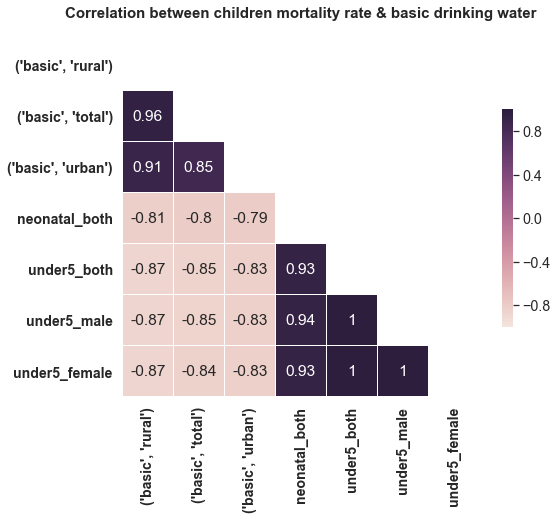

In [165]:
plot_corr_heatmap(df_w_m_basic, 'children mortality rate & basic drinking water')

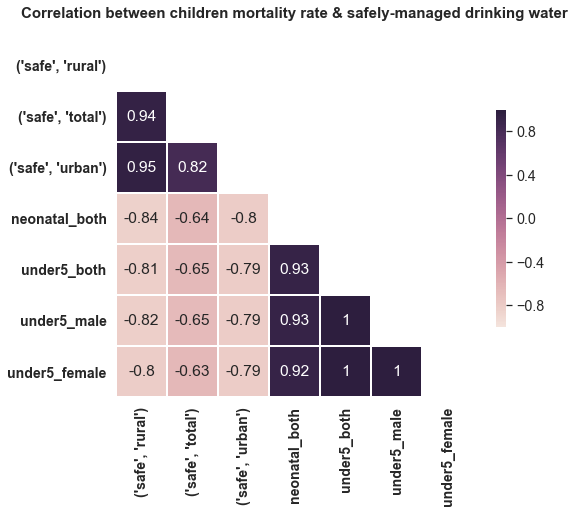

In [166]:
plot_corr_heatmap(df_w_m_safe, 'children mortality rate & safely-managed drinking water')

  > #### PART 2: Child malnutrition vs. Drinking water availability (country-based)

In [167]:
df_c.head()

,country,year,wasted,overweight,stunted,underweight
0,Afghanistan,2013,9.5,5.4,40.9,25.0
1,Afghanistan,2004,8.6,4.6,59.3,32.9
2,Afghanistan,1997,18.2,6.5,53.2,44.9
3,Albania,2018,1.6,16.4,11.3,1.5
4,Albania,2009,9.6,23.2,23.2,6.3


In [168]:
df_c.dtypes

country         object
year            object
wasted         float64
overweight     float64
stunted        float64
underweight    float64
dtype: object

In [169]:
df_w1.dtypes

country            object
year                int64
basic    rural    float64
         total    float64
         urban    float64
safe     rural    float64
         total    float64
         urban    float64
dtype: object

In [170]:
df_c.year = df_c.year.astype('int64')

In [171]:
df_c.shape

(849, 6)

In [172]:
df_w1.shape

(3455, 8)

In [173]:
df_w_c = pd.merge(df_w1, df_c, on = ['country', 'year'], how = 'left')
df_w_c

,country,year,"(country, )","(year, )","(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)",wasted,overweight,stunted,underweight
0,Afghanistan,2000,Afghanistan,2000,28.0,22.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,Afghanistan,2001,28.0,22.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,Afghanistan,2002,30.0,24.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2003,Afghanistan,2003,32.0,26.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2004,Afghanistan,2004,34.0,28.0,57.0,NaN,NaN,NaN,8.6,4.6,59.3,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,Zimbabwe,2013,Zimbabwe,2013,66.0,52.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3454,Zimbabwe,2014,Zimbabwe,2014,65.0,52.0,94.0,NaN,NaN,NaN,3.4,3.6,27.6,11.3
3455,Zimbabwe,2015,Zimbabwe,2015,65.0,51.0,94.0,NaN,NaN,NaN,3.3,5.6,27.1,8.5
3456,Zimbabwe,2016,Zimbabwe,2016,65.0,50.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
df_w_c = df_w_c.drop(df_w_c.iloc[:, 2:4], axis = 1)
df_w_c.head()

,country,year,"(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)",wasted,overweight,stunted,underweight
0,Afghanistan,2000,28.0,22.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,28.0,22.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,30.0,24.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2003,32.0,26.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2004,34.0,28.0,57.0,NaN,NaN,NaN,8.6,4.6,59.3,32.9


In [175]:
df_w_c.dropna(subset=['wasted', 'overweight', 'stunted', 'underweight'], how='all', inplace=True)

In [176]:
df_w_c

,country,year,"(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)",wasted,overweight,stunted,underweight
4,Afghanistan,2004,34.0,28.0,57.0,NaN,NaN,NaN,8.6,4.6,59.3,32.9
13,Afghanistan,2013,56.0,48.0,83.0,NaN,NaN,NaN,9.5,5.4,40.9,25.0
18,Albania,2000,88.0,82.0,96.0,49.0,NaN,NaN,12.2,30.0,39.2,17.0
23,Albania,2005,88.0,82.0,95.0,53.0,NaN,NaN,7.3,24.8,26.7,6.6
27,Albania,2009,88.0,82.0,93.0,60.0,NaN,NaN,9.6,23.2,23.2,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...
3446,Zimbabwe,2006,70.0,57.0,95.0,NaN,NaN,NaN,7.3,8.8,35.3,14.0
3449,Zimbabwe,2009,68.0,55.0,94.0,NaN,NaN,NaN,3.8,3.5,35.1,12.6
3451,Zimbabwe,2011,67.0,54.0,94.0,NaN,NaN,NaN,3.2,5.8,32.2,10.2
3454,Zimbabwe,2014,65.0,52.0,94.0,NaN,NaN,NaN,3.4,3.6,27.6,11.3


In [177]:
# df_w_c.year.value_counts().sort_index()

Split the dataset to basic and safe in order to be able to remove records with all NaNs in each dataset

In [178]:
df_w_c.columns

Index([         'country',             'year', ('basic', 'rural'),
       ('basic', 'total'), ('basic', 'urban'),  ('safe', 'rural'),
        ('safe', 'total'),  ('safe', 'urban'),           'wasted',
             'overweight',          'stunted',      'underweight'],
      dtype='object')

In [179]:
# Basic
df_w_c_basic = copy.deepcopy(df_w_c)
df_w_c_basic.drop(df_w_c_basic.iloc[:, 5:8], axis = 1, inplace = True)
df_w_c_basic.dropna(subset = list(df_w_c_basic.columns)[2:5], how = 'all', inplace=True)
df_w_c_basic.head()

,country,year,"(basic, rural)","(basic, total)","(basic, urban)",wasted,overweight,stunted,underweight
4,Afghanistan,2004,34.0,28.0,57.0,8.6,4.6,59.3,32.9
13,Afghanistan,2013,56.0,48.0,83.0,9.5,5.4,40.9,25.0
18,Albania,2000,88.0,82.0,96.0,12.2,30.0,39.2,17.0
23,Albania,2005,88.0,82.0,95.0,7.3,24.8,26.7,6.6
27,Albania,2009,88.0,82.0,93.0,9.6,23.2,23.2,6.3


In [180]:
df_w_c_basic.shape

(542, 9)

In [181]:
# Safely managed
df_w_c_safe = copy.deepcopy(df_w_c)
df_w_c_safe.drop(df_w_c_safe.iloc[:, 2:5], axis = 1, inplace = True)
df_w_c_safe.dropna(subset = list(df_w_c_safe.columns)[2:5], how = 'all', inplace=True)
df_w_c_safe.head()

,country,year,"(safe, rural)","(safe, total)","(safe, urban)",wasted,overweight,stunted,underweight
18,Albania,2000,49.0,NaN,NaN,12.2,30.0,39.2,17.0
23,Albania,2005,53.0,NaN,NaN,7.3,24.8,26.7,6.6
27,Albania,2009,60.0,NaN,NaN,9.6,23.2,23.2,6.3
127,Armenia,2001,30.0,NaN,NaN,2.5,15.7,17.3,2.6
131,Armenia,2005,44.0,NaN,NaN,5.4,11.4,17.9,4.2


In [182]:
df_w_c_safe.shape

(299, 9)

In [183]:
df_w_c_basic.set_index('year', inplace = True)
df_w_c_basic = df_w_c_basic.groupby('country').mean()
corr_basic = df_w_c_basic.corr()
corr_basic

,"(basic, rural)","(basic, total)","(basic, urban)",wasted,overweight,stunted,underweight
"(basic, rural)",1.000000,0.955153,0.899508,-0.514373,0.361200,-0.762356,-0.696652
"(basic, total)",0.955153,1.000000,0.850974,-0.442621,0.372657,-0.671703,-0.590802
"(basic, urban)",0.899508,0.850974,1.000000,-0.515926,0.320933,-0.664863,-0.626153
wasted,-0.514373,-0.442621,-0.515926,1.000000,-0.281042,0.603557,0.844544
overweight,0.361200,0.372657,0.320933,-0.281042,1.000000,-0.319702,-0.506579
stunted,-0.762356,-0.671703,-0.664863,0.603557,-0.319702,1.000000,0.859410
underweight,-0.696652,-0.590802,-0.626153,0.844544,-0.506579,0.859410,1.000000


In [184]:
df_w_c_safe.set_index('year', inplace = True)
df_w_c_safe = df_w_c_safe.groupby('country').mean()
corr_safe = df_w_c_safe.corr()
corr_safe

,"(safe, rural)","(safe, total)","(safe, urban)",wasted,overweight,stunted,underweight
"(safe, rural)",1.000000,0.924232,0.948883,-0.572706,0.227074,-0.812577,-0.688030
"(safe, total)",0.924232,1.000000,0.790296,-0.286361,0.386641,-0.573980,-0.402859
"(safe, urban)",0.948883,0.790296,1.000000,-0.543651,0.455299,-0.792918,-0.720008
wasted,-0.572706,-0.286361,-0.543651,1.000000,-0.218358,0.618303,0.846105
overweight,0.227074,0.386641,0.455299,-0.218358,1.000000,-0.270708,-0.477711
stunted,-0.812577,-0.573980,-0.792918,0.618303,-0.270708,1.000000,0.843253
underweight,-0.688030,-0.402859,-0.720008,0.846105,-0.477711,0.843253,1.000000


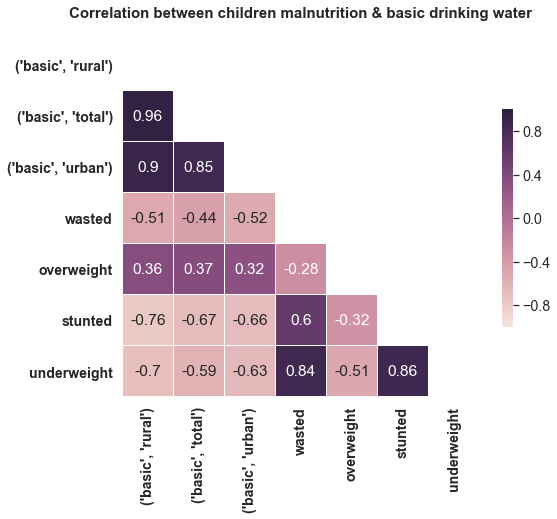

In [185]:
plot_corr_heatmap(df_w_c_basic, 'children malnutrition & basic drinking water')

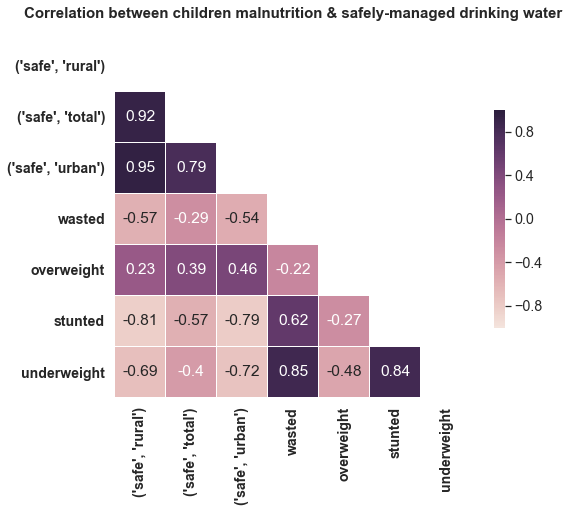

In [186]:
plot_corr_heatmap(df_w_c_safe, 'children malnutrition & safely-managed drinking water')

Is there a correlation between children's health and sanitation?

  > #### PART 1: Mortality rate vs. Sanitation (country-based)

In [187]:
df_s.head()

basic              safe            
                 rural total urban rural total urban
country                                             
Afghanistan 2000  24.0  22.0  30.0   NaN   NaN   NaN
            2001  24.0  22.0  30.0   NaN   NaN   NaN
            2002  25.0  23.0  31.0   NaN   NaN   NaN
            2003  26.0  24.0  33.0   NaN   NaN   NaN
            2004  27.0  25.0  35.0   NaN   NaN   NaN

In [188]:
df_s1 = df_s.reset_index()
df_s1.head()

country level_1 basic              safe            
                       rural total urban rural total urban
0  Afghanistan    2000  24.0  22.0  30.0   NaN   NaN   NaN
1  Afghanistan    2001  24.0  22.0  30.0   NaN   NaN   NaN
2  Afghanistan    2002  25.0  23.0  31.0   NaN   NaN   NaN
3  Afghanistan    2003  26.0  24.0  33.0   NaN   NaN   NaN
4  Afghanistan    2004  27.0  25.0  35.0   NaN   NaN   NaN

In [189]:
df_s1 = df_s1.rename(columns = {'level_1': 'year'})
df_s1.head()

country  year basic              safe            
                     rural total urban rural total urban
0  Afghanistan  2000  24.0  22.0  30.0   NaN   NaN   NaN
1  Afghanistan  2001  24.0  22.0  30.0   NaN   NaN   NaN
2  Afghanistan  2002  25.0  23.0  31.0   NaN   NaN   NaN
3  Afghanistan  2003  26.0  24.0  33.0   NaN   NaN   NaN
4  Afghanistan  2004  27.0  25.0  35.0   NaN   NaN   NaN

In [190]:
df_s1.dtypes

country            object
year                int64
basic    rural    float64
         total    float64
         urban    float64
safe     rural    float64
         total    float64
         urban    float64
dtype: object

In [191]:
df_s_m = pd.merge(df_s1, df_m_cntr1, on = ['country', 'year'], how = 'left')
df_s_m.head(25)

,country,year,"(country, )","(year, )","(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)",neonatal_both,under5_both,under5_male,under5_female
0,Afghanistan,2000,Afghanistan,2000,24.0,22.0,30.0,NaN,NaN,NaN,61,129.4,133.5,125
1,Afghanistan,2001,Afghanistan,2001,24.0,22.0,30.0,NaN,NaN,NaN,59.8,125.4,129.4,121.1
2,Afghanistan,2002,Afghanistan,2002,25.0,23.0,31.0,NaN,NaN,NaN,58.6,121.2,125.2,117
3,Afghanistan,2003,Afghanistan,2003,26.0,24.0,33.0,NaN,NaN,NaN,57.3,117,120.9,112.8
4,Afghanistan,2004,Afghanistan,2004,27.0,25.0,35.0,NaN,NaN,NaN,56,112.8,116.7,108.7
5,Afghanistan,2005,Afghanistan,2005,28.0,26.0,36.0,NaN,NaN,NaN,54.7,108.5,112.4,104.5
6,Afghanistan,2006,Afghanistan,2006,29.0,27.0,38.0,NaN,NaN,NaN,53.3,104.3,108.1,100.3
7,Afghanistan,2007,Afghanistan,2007,30.0,27.0,40.0,NaN,NaN,NaN,51.9,100.1,103.9,96.1
8,Afghanistan,2008,Afghanistan,2008,32.0,28.0,42.0,NaN,NaN,NaN,50.4,95.9,99.7,92
9,Afghanistan,2009,Afghanistan,2009,33.0,29.0,44.0,NaN,NaN,NaN,48.9,91.9,95.5,88.1


In [192]:
df_s_m = df_s_m.drop(df_s_m.iloc[:, 2:4], axis = 1)
df_s_m.head()

,country,year,"(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)",neonatal_both,under5_both,under5_male,under5_female
0,Afghanistan,2000,24.0,22.0,30.0,NaN,NaN,NaN,61,129.4,133.5,125
1,Afghanistan,2001,24.0,22.0,30.0,NaN,NaN,NaN,59.8,125.4,129.4,121.1
2,Afghanistan,2002,25.0,23.0,31.0,NaN,NaN,NaN,58.6,121.2,125.2,117
3,Afghanistan,2003,26.0,24.0,33.0,NaN,NaN,NaN,57.3,117,120.9,112.8
4,Afghanistan,2004,27.0,25.0,35.0,NaN,NaN,NaN,56,112.8,116.7,108.7


In [193]:
df_s_m.dtypes

country            object
year                int64
(basic, rural)    float64
(basic, total)    float64
(basic, urban)    float64
(safe, rural)     float64
(safe, total)     float64
(safe, urban)     float64
neonatal_both      object
under5_both        object
under5_male        object
under5_female      object
dtype: object

In [194]:
df_s_m.iloc[:, -4:] = df_s_m.iloc[:, -4:].astype('float')
df_s_m.dtypes

country            object
year                int64
(basic, rural)    float64
(basic, total)    float64
(basic, urban)    float64
(safe, rural)     float64
(safe, total)     float64
(safe, urban)     float64
neonatal_both     float64
under5_both       float64
under5_male       float64
under5_female     float64
dtype: object

Now split the data into basic and safe

In [195]:
# Basic
df_s_m_basic = copy.deepcopy(df_s_m)
df_s_m_basic.drop(df_s_m_basic.iloc[:, 5:8], axis = 1, inplace = True)
df_s_m_basic.dropna(subset = list(df_s_m_basic.columns)[2:5], how = 'all', inplace=True)
df_s_m_basic.head()

,country,year,"(basic, rural)","(basic, total)","(basic, urban)",neonatal_both,under5_both,under5_male,under5_female
0,Afghanistan,2000,24.0,22.0,30.0,61.0,129.4,133.5,125.0
1,Afghanistan,2001,24.0,22.0,30.0,59.8,125.4,129.4,121.1
2,Afghanistan,2002,25.0,23.0,31.0,58.6,121.2,125.2,117.0
3,Afghanistan,2003,26.0,24.0,33.0,57.3,117.0,120.9,112.8
4,Afghanistan,2004,27.0,25.0,35.0,56.0,112.8,116.7,108.7


In [196]:
# Safe
df_s_m_safe = copy.deepcopy(df_s_m)
df_s_m_safe.drop(df_s_m_safe.iloc[:, 2:5], axis = 1, inplace = True)
df_s_m_safe.dropna(subset = list(df_s_m_safe.columns)[2:5], how = 'all', inplace=True)
df_s_m_safe.head()

,country,year,"(safe, rural)","(safe, total)","(safe, urban)",neonatal_both,under5_both,under5_male,under5_female
18,Albania,2000,39.0,38.0,40.0,11.5,25.9,28.0,23.7
19,Albania,2001,38.0,37.0,40.0,11.1,24.5,26.5,22.4
20,Albania,2002,38.0,37.0,40.0,10.7,23.1,25.0,21.2
21,Albania,2003,38.0,37.0,40.0,10.1,21.8,23.5,19.9
22,Albania,2004,38.0,36.0,40.0,9.6,20.5,22.1,18.7


In [197]:
df_s_m_basic.set_index('year', inplace = True)
df_s_m_basic = df_s_m_basic.groupby('country').mean()
corr_basic1 = df_s_m_basic.corr()
corr_basic

,"(basic, rural)","(basic, total)","(basic, urban)",wasted,overweight,stunted,underweight
"(basic, rural)",1.000000,0.955153,0.899508,-0.514373,0.361200,-0.762356,-0.696652
"(basic, total)",0.955153,1.000000,0.850974,-0.442621,0.372657,-0.671703,-0.590802
"(basic, urban)",0.899508,0.850974,1.000000,-0.515926,0.320933,-0.664863,-0.626153
wasted,-0.514373,-0.442621,-0.515926,1.000000,-0.281042,0.603557,0.844544
overweight,0.361200,0.372657,0.320933,-0.281042,1.000000,-0.319702,-0.506579
stunted,-0.762356,-0.671703,-0.664863,0.603557,-0.319702,1.000000,0.859410
underweight,-0.696652,-0.590802,-0.626153,0.844544,-0.506579,0.859410,1.000000


In [198]:
df_s_m_safe.set_index('year', inplace = True)
df_s_m_safe = df_s_m_safe.groupby('country').mean()
corr_safe = df_s_m_safe.corr()
corr_safe

,"(safe, rural)","(safe, total)","(safe, urban)",neonatal_both,under5_both,under5_male,under5_female
"(safe, rural)",1.000000,0.988690,0.986739,-0.710931,-0.603772,-0.609696,-0.596698
"(safe, total)",0.988690,1.000000,0.966610,-0.881028,-0.781326,-0.784437,-0.777023
"(safe, urban)",0.986739,0.966610,1.000000,-0.607648,-0.536801,-0.541437,-0.531176
neonatal_both,-0.710931,-0.881028,-0.607648,1.000000,0.935146,0.937796,0.931246
under5_both,-0.603772,-0.781326,-0.536801,0.935146,1.000000,0.999627,0.999505
under5_male,-0.609696,-0.784437,-0.541437,0.937796,0.999627,1.000000,0.998273
under5_female,-0.596698,-0.777023,-0.531176,0.931246,0.999505,0.998273,1.000000


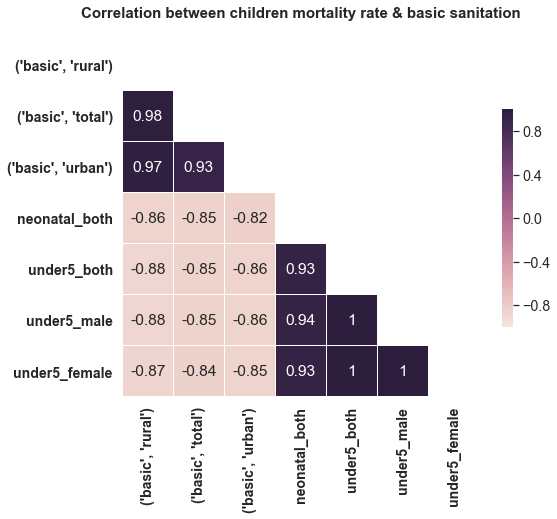

In [199]:
plot_corr_heatmap(df_s_m_basic, 'children mortality rate & basic sanitation')

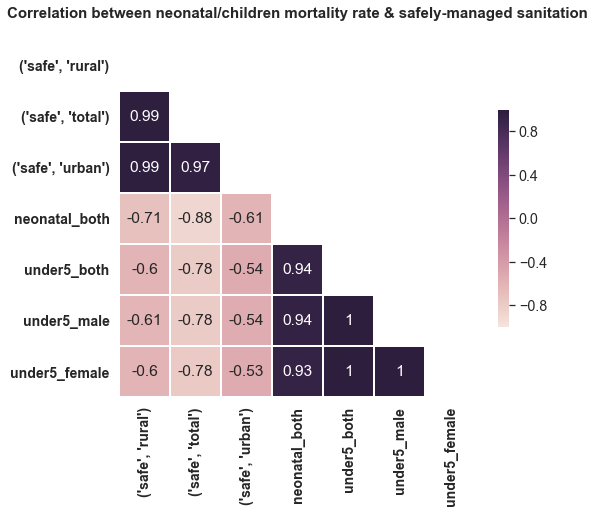

In [200]:
plot_corr_heatmap(df_s_m_safe, 'neonatal/children mortality rate & safely-managed sanitation')

> #### PART 2: Child malnutrition vs. Sanitation availability (country-based)

In [201]:
df_s_c = pd.merge(df_s1, df_c, on = ['country', 'year'], how = 'left')
df_s_c

,country,year,"(country, )","(year, )","(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)",wasted,overweight,stunted,underweight
0,Afghanistan,2000,Afghanistan,2000,24.0,22.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,Afghanistan,2001,24.0,22.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,Afghanistan,2002,25.0,23.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2003,Afghanistan,2003,26.0,24.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2004,Afghanistan,2004,27.0,25.0,35.0,NaN,NaN,NaN,8.6,4.6,59.3,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,Zimbabwe,2013,Zimbabwe,2013,39.0,33.0,52.0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
3439,Zimbabwe,2014,Zimbabwe,2014,38.0,32.0,50.0,NaN,NaN,18.0,3.4,3.6,27.6,11.3
3440,Zimbabwe,2015,Zimbabwe,2015,38.0,32.0,49.0,NaN,NaN,17.0,3.3,5.6,27.1,8.5
3441,Zimbabwe,2016,Zimbabwe,2016,37.0,32.0,48.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN


In [202]:
df_s_c.head()

,country,year,"(country, )","(year, )","(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)",wasted,overweight,stunted,underweight
0,Afghanistan,2000,Afghanistan,2000,24.0,22.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,Afghanistan,2001,24.0,22.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,Afghanistan,2002,25.0,23.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2003,Afghanistan,2003,26.0,24.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2004,Afghanistan,2004,27.0,25.0,35.0,NaN,NaN,NaN,8.6,4.6,59.3,32.9


In [203]:
df_s_c = df_s_c.drop(df_s_c.iloc[:, 2:4], axis = 1)
df_s_c.head()

,country,year,"(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)",wasted,overweight,stunted,underweight
0,Afghanistan,2000,24.0,22.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,24.0,22.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,25.0,23.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2003,26.0,24.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2004,27.0,25.0,35.0,NaN,NaN,NaN,8.6,4.6,59.3,32.9


In [204]:
df_s_c.dropna(subset=['wasted', 'overweight', 'stunted', 'underweight'], how='all', inplace=True)
df_s_c

,country,year,"(basic, rural)","(basic, total)","(basic, urban)","(safe, rural)","(safe, total)","(safe, urban)",wasted,overweight,stunted,underweight
4,Afghanistan,2004,27.0,25.0,35.0,NaN,NaN,NaN,8.6,4.6,59.3,32.9
13,Afghanistan,2013,38.0,33.0,53.0,NaN,NaN,NaN,9.5,5.4,40.9,25.0
18,Albania,2000,88.0,82.0,97.0,39.0,38.0,40.0,12.2,30.0,39.2,17.0
23,Albania,2005,92.0,88.0,97.0,38.0,36.0,40.0,7.3,24.8,26.7,6.6
27,Albania,2009,95.0,92.0,98.0,38.0,37.0,40.0,9.6,23.2,23.2,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...
3431,Zimbabwe,2006,44.0,35.0,61.0,NaN,NaN,22.0,7.3,8.8,35.3,14.0
3434,Zimbabwe,2009,42.0,34.0,57.0,NaN,NaN,20.0,3.8,3.5,35.1,12.6
3436,Zimbabwe,2011,40.0,33.0,54.0,NaN,NaN,19.0,3.2,5.8,32.2,10.2
3439,Zimbabwe,2014,38.0,32.0,50.0,NaN,NaN,18.0,3.4,3.6,27.6,11.3


Split the dataset to basic and safe in order to be able to remove records with all NaNs in each dataset

In [205]:
# Basic
df_s_c_basic = copy.deepcopy(df_s_c)
df_s_c_basic.drop(df_s_c_basic.iloc[:, 5:8], axis = 1, inplace = True)
df_s_c_basic.dropna(subset = list(df_s_c_basic.columns)[2:5], how = 'all', inplace=True)
df_s_c_basic.head()

,country,year,"(basic, rural)","(basic, total)","(basic, urban)",wasted,overweight,stunted,underweight
4,Afghanistan,2004,27.0,25.0,35.0,8.6,4.6,59.3,32.9
13,Afghanistan,2013,38.0,33.0,53.0,9.5,5.4,40.9,25.0
18,Albania,2000,88.0,82.0,97.0,12.2,30.0,39.2,17.0
23,Albania,2005,92.0,88.0,97.0,7.3,24.8,26.7,6.6
27,Albania,2009,95.0,92.0,98.0,9.6,23.2,23.2,6.3


In [206]:
# Safely managed
df_s_c_safe = copy.deepcopy(df_s_c)
df_s_c_safe.drop(df_s_c_safe.iloc[:, 2:5], axis = 1, inplace = True)
df_s_c_safe.dropna(subset = list(df_s_c_safe.columns)[2:5], how = 'all', inplace=True)
df_s_c_safe.head()

,country,year,"(safe, rural)","(safe, total)","(safe, urban)",wasted,overweight,stunted,underweight
18,Albania,2000,39.0,38.0,40.0,12.2,30.0,39.2,17.0
23,Albania,2005,38.0,36.0,40.0,7.3,24.8,26.7,6.6
27,Albania,2009,38.0,37.0,40.0,9.6,23.2,23.2,6.3
36,Algeria,2000,19.0,19.0,18.0,3.1,14.7,23.6,5.4
38,Algeria,2002,18.0,19.0,18.0,9.6,15.1,24.0,11.1


In [207]:
df_s_c_basic.set_index('year', inplace = True)
df_s_c_basic = df_s_c_basic.groupby('country').mean()
corr_basic = df_s_c_basic.corr()
corr_basic

,"(basic, rural)","(basic, total)","(basic, urban)",wasted,overweight,stunted,underweight
"(basic, rural)",1.000000,0.974391,0.959374,-0.525790,0.433939,-0.790160,-0.736289
"(basic, total)",0.974391,1.000000,0.908072,-0.498529,0.459575,-0.734291,-0.682604
"(basic, urban)",0.959374,0.908072,1.000000,-0.440805,0.411170,-0.705985,-0.628668
wasted,-0.525790,-0.498529,-0.440805,1.000000,-0.278970,0.603100,0.844187
overweight,0.433939,0.459575,0.411170,-0.278970,1.000000,-0.318183,-0.505868
stunted,-0.790160,-0.734291,-0.705985,0.603100,-0.318183,1.000000,0.859486
underweight,-0.736289,-0.682604,-0.628668,0.844187,-0.505868,0.859486,1.000000


In [208]:
df_s_c_safe.set_index('year', inplace = True)
df_s_c_safe = df_s_c_safe.groupby('country').mean()
corr_safe = df_s_c_safe.corr()
corr_safe

,"(safe, rural)","(safe, total)","(safe, urban)",wasted,overweight,stunted,underweight
"(safe, rural)",1.000000,0.983370,0.973385,-0.327992,-0.217592,-0.580844,-0.391602
"(safe, total)",0.983370,1.000000,0.935416,-0.533704,0.187053,-0.721245,-0.608438
"(safe, urban)",0.973385,0.935416,1.000000,-0.201801,-0.155391,-0.341516,-0.210059
wasted,-0.327992,-0.533704,-0.201801,1.000000,-0.162064,0.710218,0.845314
overweight,-0.217592,0.187053,-0.155391,-0.162064,1.000000,-0.256025,-0.442972
stunted,-0.580844,-0.721245,-0.341516,0.710218,-0.256025,1.000000,0.897538
underweight,-0.391602,-0.608438,-0.210059,0.845314,-0.442972,0.897538,1.000000


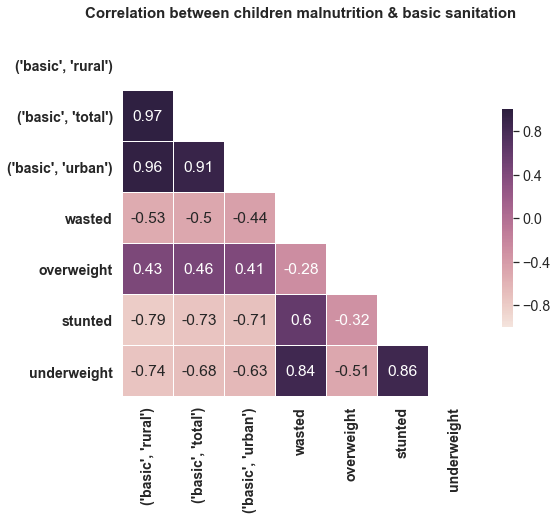

In [209]:
plot_corr_heatmap(df_s_c_basic, 'children malnutrition & basic sanitation')

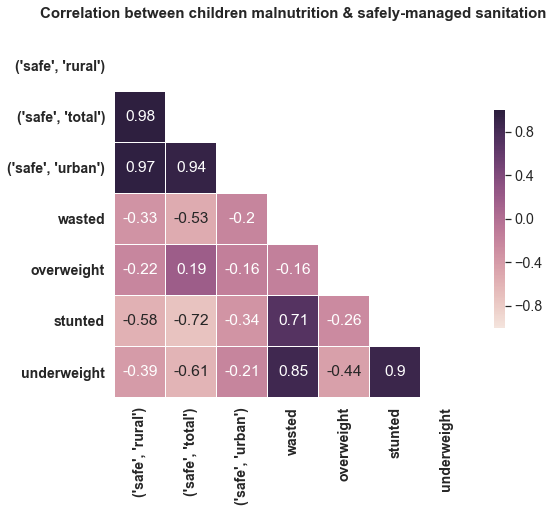

In [210]:
plot_corr_heatmap(df_s_c_safe, 'children malnutrition & safely-managed sanitation')

### Q8
Review Malaria based death seen across the World. Is there a correlation of Malaria, which is a communicable disease, with water and sanitation facilities?

In [211]:
df_com_dis_cntr = pd.read_csv(communicable_disease_url)
df_com_dis_regn = pd.read_csv(communicable_disease_region_url)

In [212]:
df_com_dis_cntr.head()

,Unnamed: 0,New HIV infections (per 1000 uninfected population),Incidence of tuberculosis (per 100 000 population per year),Incidence of tuberculosis (per 100 000 population per year).1,Incidence of tuberculosis (per 100 000 population per year).2,Incidence of tuberculosis (per 100 000 population per year).3,Incidence of tuberculosis (per 100 000 population per year).4,Incidence of tuberculosis (per 100 000 population per year).5,Incidence of tuberculosis (per 100 000 population per year).6,Incidence of tuberculosis (per 100 000 population per year).7,...,Malaria incidence (per 1 000 population at risk).7,Hepatitis B surface antigen (HBsAg) prevalence among children under 5 years (%),Reported number of people requiring interventions against NTDs,Reported number of people requiring interventions against NTDs.1,Reported number of people requiring interventions against NTDs.2,Reported number of people requiring interventions against NTDs.3,Reported number of people requiring interventions against NTDs.4,Reported number of people requiring interventions against NTDs.5,Reported number of people requiring interventions against NTDs.6,Reported number of people requiring interventions against NTDs.7
0,NaN,2018,2018,2017,2016,2015,2014,2013,2012,2011,...,2010,2015,2017,2016,2015,2014,2013,2012,2011,2010
1,Country,,,,,,,,,,...,Both sexes,,,,,,,,,
2,Afghanistan,0.02 [0.01–0.04],189 [122-270],189 [122-270],189 [122-270],189 [122-270],189 [122-270],189 [122-270],189 [122-270],189 [123-270],...,15.92,0.50 [0.29-0.78],13 547 677,13 275 429,13 765 392,13 384 908,13 291 651,14 045 789,12 600 642,12 246 738
3,Albania,No data,18 [15-20],20 [17-23],17 [14-19],17 [14-19],16 [14-19],19 [16-22],16 [14-19],17 [14-19],...,NaN,1.29 [0.83-1.91],6,21,16,33,55,53,53,61
4,Algeria,0.03 [0.03–0.03],69 [53-88],70 [53-88],70 [54-89],75 [57-94],72 [55-91],68 [52-86],73 [56-93],73 [56-92],...,0.00,0.22 [0.12-0.34],13 140,10 752,7561,5460,22 713,7471,11 831,10 260


In [213]:
df_com_dis_cntr.columns

Index(['Unnamed: 0', 'New HIV infections (per 1000 uninfected population)',
       'Incidence of tuberculosis (per 100 000 population per year)',
       'Incidence of tuberculosis (per 100 000 population per year).1',
       'Incidence of tuberculosis (per 100 000 population per year).2',
       'Incidence of tuberculosis (per 100 000 population per year).3',
       'Incidence of tuberculosis (per 100 000 population per year).4',
       'Incidence of tuberculosis (per 100 000 population per year).5',
       'Incidence of tuberculosis (per 100 000 population per year).6',
       'Incidence of tuberculosis (per 100 000 population per year).7',
       'Incidence of tuberculosis (per 100 000 population per year).8',
       'Malaria incidence (per 1 000 population at risk)',
       'Malaria incidence (per 1 000 population at risk).1',
       'Malaria incidence (per 1 000 population at risk).2',
       'Malaria incidence (per 1 000 population at risk).3',
       'Malaria incidence (per 1 000

In [214]:
df_malaria_cntr = df_com_dis_cntr.iloc[:, np.r_[0, 11:19]]
df_malaria_cntr.head()

,Unnamed: 0,Malaria incidence (per 1 000 population at risk),Malaria incidence (per 1 000 population at risk).1,Malaria incidence (per 1 000 population at risk).2,Malaria incidence (per 1 000 population at risk).3,Malaria incidence (per 1 000 population at risk).4,Malaria incidence (per 1 000 population at risk).5,Malaria incidence (per 1 000 population at risk).6,Malaria incidence (per 1 000 population at risk).7
0,NaN,2017,2016,2015,2014,2013,2012,2011,2010
1,Country,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes
2,Afghanistan,23.01,23.00,14.22,11.26,8.75,11.76,19.86,15.92
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,0,0,0,0,0.00,0.02,0.00,0.00


In [215]:
df_malaria_cntr.drop([0,1], axis = 0, inplace = True)

C:\Users\Ali\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [216]:
df_malaria_cntr.rename(columns = {'Unnamed: 0': 'country'}, inplace = True)

C:\Users\Ali\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [217]:
df_malaria_cntr.head()

,country,Malaria incidence (per 1 000 population at risk),Malaria incidence (per 1 000 population at risk).1,Malaria incidence (per 1 000 population at risk).2,Malaria incidence (per 1 000 population at risk).3,Malaria incidence (per 1 000 population at risk).4,Malaria incidence (per 1 000 population at risk).5,Malaria incidence (per 1 000 population at risk).6,Malaria incidence (per 1 000 population at risk).7
2,Afghanistan,23.01,23.00,14.22,11.26,8.75,11.76,19.86,15.92
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,0,0,0,0,0.00,0.02,0.00,0.00
5,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Angola,154.97,155.66,154.48,139.97,130.20,123.99,125.54,133.76


In [218]:
df_malaria_cntr.set_index('country', inplace = True)

In [219]:
df_malaria_cntr.dtypes

Malaria incidence (per 1 000 population at risk)      object
Malaria incidence (per 1 000 population at risk).1    object
Malaria incidence (per 1 000 population at risk).2    object
Malaria incidence (per 1 000 population at risk).3    object
Malaria incidence (per 1 000 population at risk).4    object
Malaria incidence (per 1 000 population at risk).5    object
Malaria incidence (per 1 000 population at risk).6    object
Malaria incidence (per 1 000 population at risk).7    object
dtype: object

In [220]:
df_malaria_cntr = df_malaria_cntr.astype('float64')

In [221]:
df_malaria_cntr.dtypes

Malaria incidence (per 1 000 population at risk)      float64
Malaria incidence (per 1 000 population at risk).1    float64
Malaria incidence (per 1 000 population at risk).2    float64
Malaria incidence (per 1 000 population at risk).3    float64
Malaria incidence (per 1 000 population at risk).4    float64
Malaria incidence (per 1 000 population at risk).5    float64
Malaria incidence (per 1 000 population at risk).6    float64
Malaria incidence (per 1 000 population at risk).7    float64
dtype: object

In [222]:
df_malaria_cntr_avg = df_malaria_cntr.mean(axis = 1)
df_malaria_cntr_avg = df_malaria_cntr_avg.reset_index()
df_malaria_cntr_avg.rename(columns = {0: 'incident_per_1000'}, inplace = True)
df_malaria_cntr_avg

,country,incident_per_1000
0,Afghanistan,15.97250
1,Albania,NaN
2,Algeria,0.00250
3,Andorra,NaN
4,Angola,139.82125
...,...,...
189,Venezuela (Bolivarian Republic of),16.32500
190,Viet Nam,0.24000
191,Yemen,46.04625
192,Zambia,195.41125


In [223]:
# Merge tables on country
df_malaria_world = world.merge(df_malaria_cntr_avg, on = 'country', how = 'left')
df_malaria_world.head()

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,incident_per_1000
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((16810130.626 -1718409.644, 167...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3202917.599 -101604.324, 3218827.080...",NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-791398.083 2957886.876, -791499.326...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -10...",NaN
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-10141906.052 5223243.610, -99...",NaN


In [224]:
def plot_map_malaria(df, group):
    '''A fucntion to plot the geographical heat map for malaria incidents per country'''
    # Filter data: NaNs mean that there are no data available for that country
    known = df.dropna(subset = [group])
    ax = df.plot(color = 'white', edgecolor = '#aaaaaa', figsize = (20,12))
    known.plot(column = group, ax = ax, cmap = 'YlOrRd', figsize = (20, 12), \
                    scheme = 'fisher_jenks', k = 9, legend = True, edgecolor = '#aaaaaa')
    description1 = '''% {0} per country'''.format(str.capitalize(group)).strip()
    ax.annotate(description1, xy = (0.07, 0.18), size = 15, xycoords = 'figure fraction')
    description2 = '''NOTE: countries with no data available are shown in plain white color'''.strip()
    ax.annotate(description2, xy = (0.07, 0.12), size = 15, xycoords = 'figure fraction')
    ax.set_axis_off()
    ax.set_title('Incident of malaria per 1000 people (per country)', fontsize = 17, fontweight = 'bold')
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((.11, .5))
    legend.prop.set_size(15)

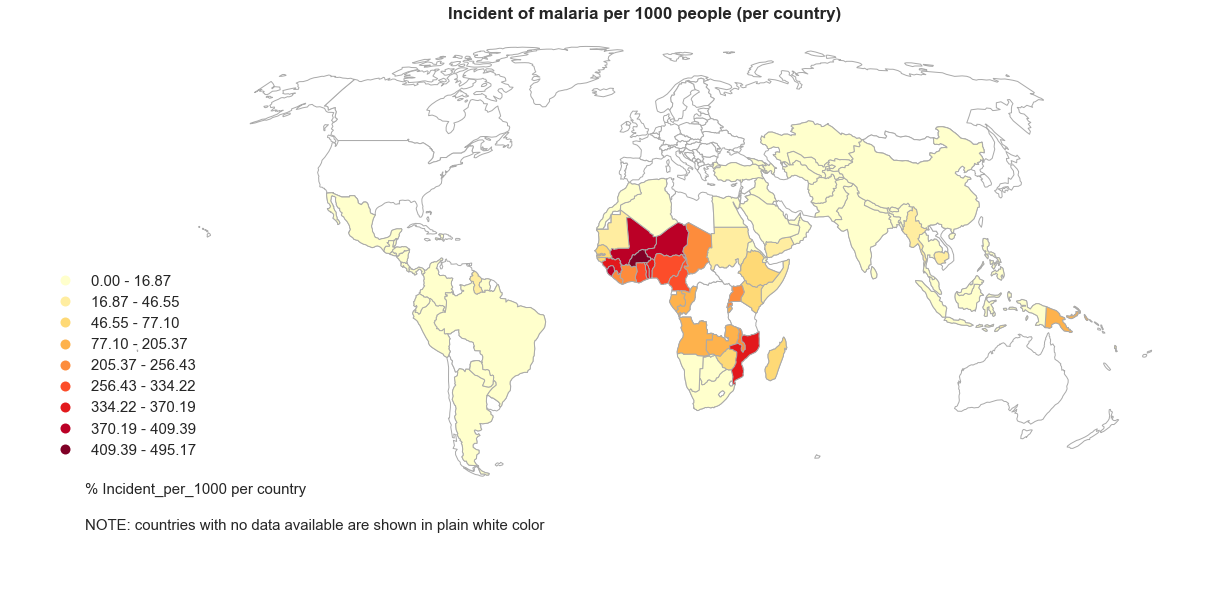

In [225]:
# Incident of malaria per 1000 people averaged over 8 years (2010-2017) per country
plot_map_malaria(df_malaria_world, 'incident_per_1000')

### Malaria vs. Water availability (by country)

In [226]:
df_w.head()

basic              safe            
                 rural total urban rural total urban
country                                             
Afghanistan 2000  28.0  22.0  49.0   NaN   NaN   NaN
            2001  28.0  22.0  49.0   NaN   NaN   NaN
            2002  30.0  24.0  52.0   NaN   NaN   NaN
            2003  32.0  26.0  54.0   NaN   NaN   NaN
            2004  34.0  28.0  57.0   NaN   NaN   NaN

In [227]:
df_malaria_cntr_avg1 = copy.deepcopy(df_malaria_cntr_avg)
df_malaria_cntr_avg1.set_index('country', inplace = True)

In [228]:
# Calculate the df_w_avg between 2010-2017
df_w_1 = copy.deepcopy(df_w)
df_w_1.reset_index(level = 1, inplace  = True)

df_w_1 = df_w_1[(df_w_1.level_1 >= 2010) & (df_w_1.level_1 <= 2017)]
df_w_1 = df_w_1.rename(columns = {'level_1': 'year'})
df_w_1.set_index('year', append = True, inplace = True)
df_w_1

basic              safe            
                 rural total urban rural total urban
country     year                                    
Afghanistan 2010  48.0  41.0  74.0   NaN   NaN   NaN
            2011  51.0  43.0  77.0   NaN   NaN   NaN
            2012  54.0  45.0  80.0   NaN   NaN   NaN
            2013  56.0  48.0  83.0   NaN   NaN   NaN
            2014  59.0  50.0  86.0   NaN   NaN   NaN
...                ...   ...   ...   ...   ...   ...
Zimbabwe    2013  66.0  52.0  94.0   NaN   NaN   NaN
            2014  65.0  52.0  94.0   NaN   NaN   NaN
            2015  65.0  51.0  94.0   NaN   NaN   NaN
            2016  65.0  50.0  94.0   NaN   NaN   NaN
            2017  64.0  50.0  94.0   NaN   NaN   NaN

[1543 rows x 6 columns]

In [229]:
df_w_avg_1 = df_w_1.groupby([df_w_1.index.get_level_values(0)]).mean().round(2)
df_w_avg_1.columns = df_w_avg_1.columns.droplevel(0)
df_w_avg_1.head()

,rural,total,urban,rural,total,urban
country,,,,,,
Afghanistan,57.62,48.88,84.75,NaN,NaN,NaN
Albania,89.62,86.62,92.25,67.5,NaN,NaN
Algeria,93.12,88.12,95.00,NaN,NaN,NaN
Andorra,100.00,100.00,100.00,91.0,NaN,NaN
Angola,53.12,26.12,69.50,NaN,NaN,NaN


In [230]:
df_malaria_water = pd.merge(df_malaria_cntr_avg1, df_w_avg_1, left_index = True, right_index = True).dropna(how = 'all')
df_malaria_water.head()

,incident_per_1000,rural,total,urban,rural,total,urban
country,,,,,,,
Afghanistan,15.97250,57.62,48.88,84.75,NaN,NaN,NaN
Albania,NaN,89.62,86.62,92.25,67.5,NaN,NaN
Algeria,0.00250,93.12,88.12,95.00,NaN,NaN,NaN
Andorra,NaN,100.00,100.00,100.00,91.0,NaN,NaN
Angola,139.82125,53.12,26.12,69.50,NaN,NaN,NaN


In [231]:
df_malaria_water.describe()

,incident_per_1000,rural,total,urban,rural,total,urban
count,107.000000,194.000000,166.000000,169.000000,98.000000,34.000000,52.000000
mean,87.183563,86.286186,77.870422,93.351598,77.077551,40.386471,69.894423
std,132.838384,17.148662,23.118377,8.509052,26.645819,27.719118,25.275211
min,0.000000,37.250000,21.500000,58.290000,6.620000,3.120000,11.880000
25%,0.218125,76.630000,60.465000,89.250000,59.440000,17.437500,50.285000
50%,11.443750,95.000000,87.750000,97.620000,91.060000,34.690000,77.120000
75%,149.891875,99.000000,98.000000,99.500000,97.970000,54.750000,92.155000
max,495.172500,100.000000,100.000000,100.000000,100.000000,99.500000,100.000000


In [232]:
# Correlation coefficients
df_malaria_water.corr(method='spearman')

,incident_per_1000,rural,total,urban,rural,total,urban
incident_per_1000,1.000000,-0.787549,-0.775191,-0.787458,-0.678173,-0.688449,-0.705916
rural,-0.787549,1.000000,0.970212,0.951468,0.862268,0.798242,0.737574
total,-0.775191,0.970212,1.000000,0.891039,0.850125,0.820203,0.628221
urban,-0.787458,0.951468,0.891039,1.000000,0.809841,0.680122,0.765622
rural,-0.678173,0.862268,0.850125,0.809841,1.000000,0.944088,0.966364
total,-0.688449,0.798242,0.820203,0.680122,0.944088,1.000000,0.847924
urban,-0.705916,0.737574,0.628221,0.765622,0.966364,0.847924,1.000000


In [233]:
def plot_malaria_ws(df, title):
    '''A function to plot results for malaria'''
    plt.style.use('seaborn-white')
    fig, ax = plt.subplots(figsize = [8,8])
    sns.set(font_scale = 1.3)
    x1 = df.iloc[:,0]
    y1 = df.iloc[:, 1]
    y2 = df.iloc[:, 3]
    y3 = df.iloc[:, 4]
    y4 = df.iloc[:, 6]

    ax = sns.regplot(x = x1, y = y1, color = 'b', label = 'basic, rural')
    sns.regplot(x = x1, y = y2, color = 'g', label = 'basic, urban')
    sns.regplot(x = x1, y = y3, color = 'r', label = 'safe, rural')
    sns.regplot(x = x1, y = y4, color = 'purple', label = 'safe, urban')

    ax.set_title('Malaria incidents vs {0} availability'.format(title), fontweight = 'bold')
    ax.set_xlim([0, 600])
    ax.set_ylim([0 , 110])
    ax.set_xlabel('Malaria Incidents per 1000 people', fontweight = 'bold')
    ax.set_ylabel('Population with {0} availability (%)'.format(title), fontweight = 'bold')
    ax.legend()

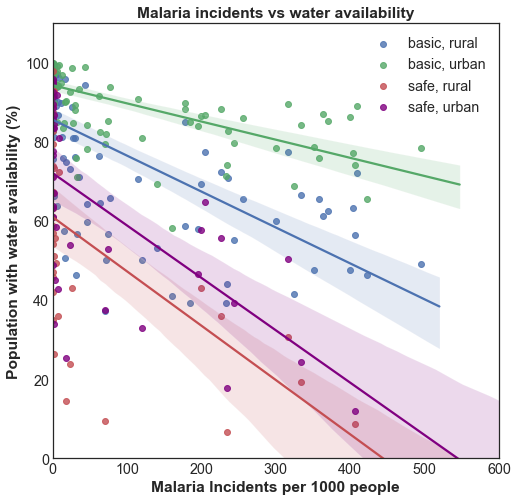

In [234]:
# Malaria incidents vs. for basic/safely-managed drinking water in both rural adn urban areas
plot_malaria_ws(df_malaria_water, 'water')

### Malaria vs. Sanitation availability (by country)

In [235]:
# Calculate the df_s_avg between 2010-2017
df_s_1 = copy.deepcopy(df_s)
df_s_1.reset_index(level = 1, inplace  = True)

df_s_1 = df_s_1[(df_s_1.level_1 >= 2010) & (df_s_1.level_1 <= 2017)]
df_s_1 = df_s_1.rename(columns = {'level_1': 'year'})
df_s_1.set_index('year', append = True, inplace = True)
df_s_avg_1 = df_s_1.groupby([df_s_1.index.get_level_values(0)]).mean().round(2)
df_s_avg_1.columns = df_s_avg_1.columns.droplevel(0)
df_s_avg_1.head()

,rural,total,urban,rural,total,urban
country,,,,,,
Afghanistan,38.62,33.50,54.25,NaN,NaN,NaN
Albania,97.25,95.75,98.00,39.62,38.50,40.00
Algeria,87.25,81.00,90.00,18.00,20.62,16.62
Andorra,100.00,100.00,100.00,97.50,97.50,97.50
Angola,45.50,20.00,60.50,NaN,NaN,NaN


In [236]:
df_malaria_sanitation = pd.merge(df_malaria_cntr_avg1, df_s_avg_1, left_index = True, right_index = True).dropna(how = 'all')
df_malaria_sanitation.head()

,incident_per_1000,rural,total,urban,rural,total,urban
country,,,,,,,
Afghanistan,15.97250,38.62,33.50,54.25,NaN,NaN,NaN
Albania,NaN,97.25,95.75,98.00,39.62,38.50,40.00
Algeria,0.00250,87.25,81.00,90.00,18.00,20.62,16.62
Andorra,NaN,100.00,100.00,100.00,97.50,97.50,97.50
Angola,139.82125,45.50,20.00,60.50,NaN,NaN,NaN


In [237]:
df_malaria_sanitation.describe()

,incident_per_1000,rural,total,urban,rural,total,urban
count,107.000000,194.000000,165.000000,168.000000,88.000000,44.000000,73.000000
mean,87.183563,73.814845,64.284061,77.392440,65.683068,57.395000,62.703973
std,132.838384,29.279577,33.329964,25.123081,29.546682,33.055873,31.311588
min,0.000000,6.500000,3.250000,16.000000,6.120000,3.380000,4.250000
25%,0.218125,49.840000,33.880000,55.905000,40.940000,23.370000,37.250000
50%,11.443750,87.690000,73.880000,90.000000,75.440000,57.250000,68.620000
75%,149.891875,97.750000,95.750000,98.000000,93.000000,89.655000,93.750000
max,495.172500,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000


In [238]:
# Correlation coefficients
df_malaria_sanitation.corr(method='spearman')

,incident_per_1000,rural,total,urban,rural,total,urban
incident_per_1000,1.000000,-0.849566,-0.834389,-0.836736,-0.600932,-0.579201,-0.484011
rural,-0.849566,1.000000,0.984765,0.977528,0.775410,0.896961,0.756925
total,-0.834389,0.984765,1.000000,0.945585,0.807148,0.900013,0.729572
urban,-0.836736,0.977528,0.945585,1.000000,0.724604,0.886619,0.670773
rural,-0.600932,0.775410,0.807148,0.724604,1.000000,0.961118,0.985197
total,-0.579201,0.896961,0.900013,0.886619,0.961118,1.000000,0.924284
urban,-0.484011,0.756925,0.729572,0.670773,0.985197,0.924284,1.000000


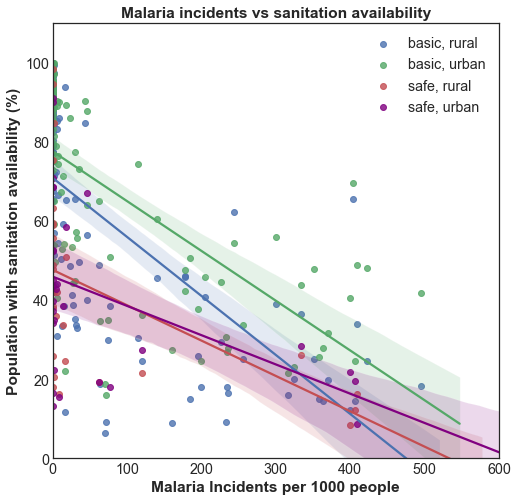

In [239]:
# Malaria incidents vs. for basic/safely-managed sanitation in both rural adn urban areas
plot_malaria_ws(df_malaria_sanitation, 'sanitation')